# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Collection and Preprocessing

In [2]:
df = pd.read_csv("infolimpioavanzadoTarget.csv")
df.head()

date       open       high        low      close   adjclose  volume   
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600  \
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15   
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN  \
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo   
0              NaN              NaN               NaN         0.919758  \
1              NaN              NaN               NaN         1.110440   
2              NaN              NaN               NaN         0.889560   
3              NaN              NaN               NaN         1.497843   
4              NaN              NaN               NaN         1.188956   

       diff  INCREMENTO  TARGET  
0 -1.900001   -9.664295       0  
1 -1.379999   -7.247895       0  
2 -0.930000   -5.201344       0  
3 -0.360000   -2.177856       0  
4 -0.120000   -0.758054       0  

[5 rows x 1285 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


In [4]:
df.shape

(7781, 1285)

In [5]:
df.isna().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [6]:
df.dtypes

date                 object
open                float64
high                float64
low                 float64
close               float64
                     ...   
stochastic-kd-15    float64
volumenrelativo     float64
diff                float64
INCREMENTO          float64
TARGET                int64
Length: 1285, dtype: object

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.describe()

date         open         high          low   
count                           7781  7781.000000  7781.000000  7781.000000  \
mean   2022-07-02 15:23:39.920318720    34.990220    35.655999    34.301243   
min              2022-01-03 00:00:00     0.410000     0.435000     0.405000   
25%              2022-04-01 00:00:00     4.050000     4.130000     3.980000   
50%              2022-07-05 00:00:00    10.080000    10.110000    10.005000   
75%              2022-10-03 00:00:00    24.350000    24.500000    24.080000   
max              2022-12-30 00:00:00   795.739990   799.359985   784.960022   
std                              NaN    99.841502   101.451058    98.073945   

             close     adjclose        volume  RSIadjclose15  RSIvolume15   
count  7781.000000  7781.000000  7.781000e+03    7316.000000  7316.000000  \
mean     34.964414    34.483147  7.586022e+05      46.817434    49.814790   
min       0.408000     0.408000  0.000000e+00       6.837461    35.303213   
25%       4.030000     3.960000  1.080000e+04      38.946316    47.182234   
50%      10.080000    10.061000  8.406000e+04      46.259711    48.356834   
75%      24.250000    22.466007  6.724000e+05      54.061089    50.902284   
max     797.489990   783.376221  1.615550e+08      96.365095    99.622735   
std      99.790823    98.603879  3.934491e+06      11.672838     5.002664   

       RSIadjclose25  ...      high-15         K-15         D-15   
count    7006.000000  ...  7347.000000  7262.000000  7194.000000  \
mean       46.966016  ...    37.947291    18.673824    18.704812   
min        17.693637  ...     0.510000  -668.212635  -626.263336   
25%        40.954487  ...     4.565000     6.153839     8.336837   
50%        46.459477  ...    10.640000    28.484828    28.478797   
75%        52.289893  ...    25.170000    59.688404    58.664021   
max        91.023108  ...   799.359985   100.000000   100.000000   
std         8.760961  ...   107.340294    75.723295    74.210933   

       stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo   
count      7262.000000      7194.000000       7194.000000      7566.000000  \
mean         18.673824        18.704812          0.298413              inf   
min        -668.212635      -626.263336       -211.219037         0.000000   
25%           6.153839         8.336837         -6.585432         0.637237   
50%          28.484828        28.478797          0.000000         1.000000   
75%          59.688404        58.664021          6.726947         1.655385   
max         100.000000       100.000000        198.156313              inf   
std          75.723295        74.210933         14.661948              NaN   

              diff    INCREMENTO       TARGET  
count  7626.000000   7626.000000  7781.000000  
mean     -0.259186     -2.674224     0.183010  
min     -90.538818 -23399.465955     0.000000  
25%      -0.417873     -4.494383     0.000000  
50%      -0.025000     -0.304004     0.000000  
75%       0.240000      2.812552     0.000000  
max     120.256775    425.000000     1.000000  
std       7.334250    268.268134     0.386699  

[8 rows x 1284 columns]

# Feature Selection

In [9]:
data = df[['date', 'open', 'high', 'low', 'close', 'volume', 'TARGET']]
data

date       open       high        low      close  volume  TARGET
0    2022-01-03  17.799999  18.219000  17.500000  17.760000  106600       0
1    2022-01-04  17.700001  18.309999  17.620001  17.660000  128700       0
2    2022-01-05  17.580000  17.799999  16.910000  16.950001  103100       0
3    2022-01-06  16.650000  16.879999  16.139999  16.170000  173600       0
4    2022-01-07  16.219999  16.290001  15.630000  15.710000  137800       0
...         ...        ...        ...        ...        ...     ...     ...
7776 2022-12-23  23.250000  23.540001  23.250000  23.290001    4900       0
7777 2022-12-27  23.350000  23.610001  23.250000  23.350000    9200       0
7778 2022-12-28  23.450001  23.570000  23.219999  23.350000   15200       0
7779 2022-12-29  23.330000  23.740000  23.330000  23.610001    7100       0
7780 2022-12-30  23.680000  23.760000  23.610001  23.610001    7100       0

[7781 rows x 7 columns]

In [10]:
data.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
TARGET    0
dtype: int64

In [11]:
# CREATING A DICTIONARY THAT STORES EACH COMPANY'S DATA

company_list = df['ticker'].unique()
company_data = {}

for company in company_list:
    company_data[company] = data[df['ticker'] == company]
    
company_data

{'ASLE':           date       open       high        low      close  volume  TARGET
 0   2022-01-03  17.799999  18.219000  17.500000  17.760000  106600       0
 1   2022-01-04  17.700001  18.309999  17.620001  17.660000  128700       0
 2   2022-01-05  17.580000  17.799999  16.910000  16.950001  103100       0
 3   2022-01-06  16.650000  16.879999  16.139999  16.170000  173600       0
 4   2022-01-07  16.219999  16.290001  15.630000  15.710000  137800       0
 ..         ...        ...        ...        ...        ...     ...     ...
 246 2022-12-23  15.360000  15.590000  15.240000  15.380000  153100       0
 247 2022-12-27  15.430000  15.825000  15.100000  15.670000  116600       0
 248 2022-12-28  15.690000  15.940000  15.450000  15.760000  187200       0
 249 2022-12-29  15.880000  16.070000  15.770000  16.040001  194000       0
 250 2022-12-30  16.000000  16.240000  15.770000  16.219999  232000       0
 
 [251 rows x 7 columns],
 'ASLN':           date   open   high    low  close  

In [12]:
# CHECKING IF THERE IS A DUPLICATE DATA FOR EACH TICKER/COMPANY

for company in company_data.keys():
    df1 = data[df['ticker'] == company]
    print(df1.duplicated().any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


# Visualization (Insights)

In [13]:
print(f'Dataframe contains stock prices FROM {data.date.min()} TO {data.date.max()}')
print(f'Total days = {(data.date.max() - data.date.min()).days} days')

Dataframe contains stock prices FROM 2022-01-03 00:00:00 TO 2022-12-30 00:00:00
Total days = 361 days


<font size="3" face="verdana"><b>Data is of year 2022 </b></font>

<font size="3" color="blue" face="verdana"><b>1. Change in Closing Price </b></font>

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

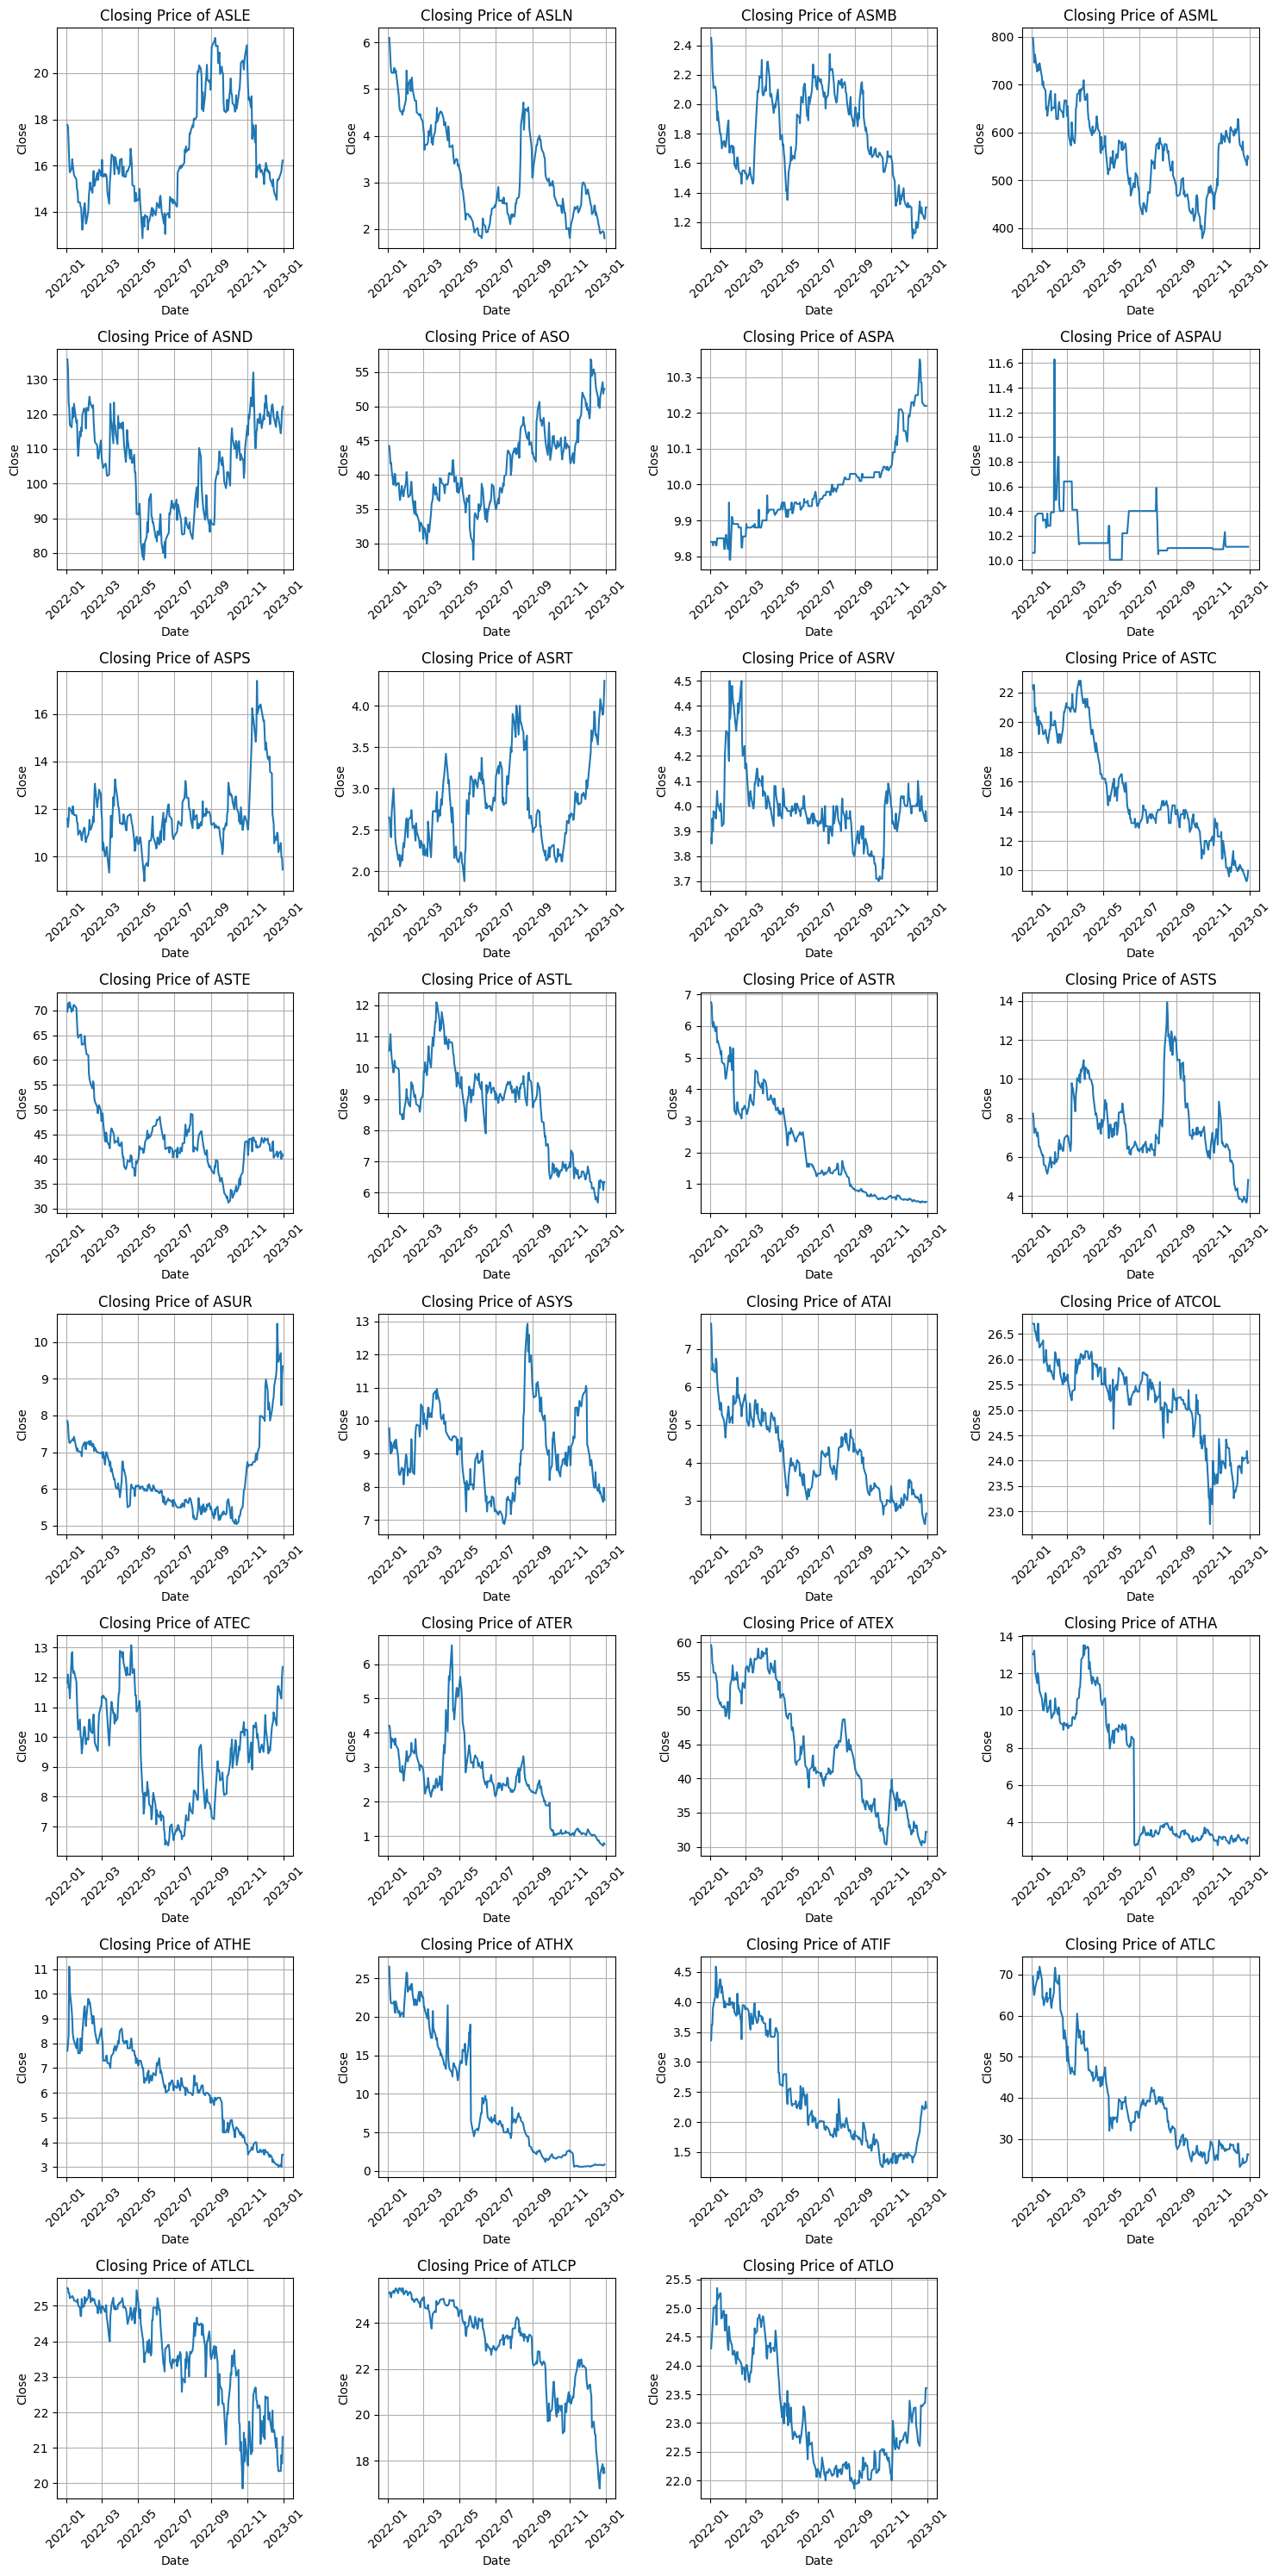

In [14]:
plt.figure(figsize=(15, 30))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    comp_data = data[df['ticker'] == company]
    plt.subplot(8, 4, i)
    plt.plot(comp_data['date'], comp_data['close'])
    plt.ylabel('Close')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.title(f"Closing Price of {company_list[i - 1]}")
    plt.grid()

plt.tight_layout()

<font size="3" color="blue" face="verdana"><b>2. What was the moving average of the various stocks?
    
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.</b></font>

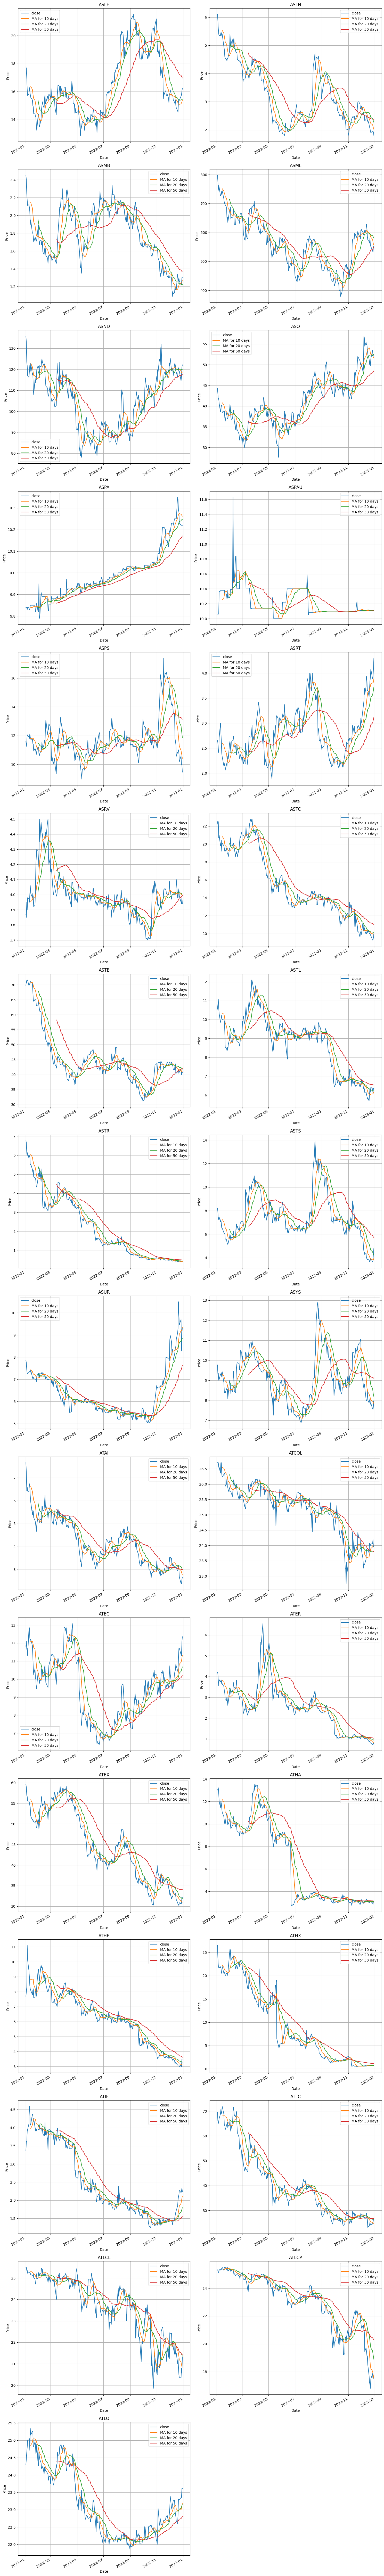

In [15]:
ma_days = [10, 20, 50]

num_rows = 16
num_cols = 2

num_tickers = len(company_list)

num_plots = num_rows * num_cols
num_subplots = min(num_tickers, num_plots)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 100))

for i, ticker in enumerate(company_list[:num_subplots]):
    row = i // num_cols
    col = i % num_cols
    
    ticker_data = data[df['ticker'] == ticker]
    
    for ma_day in ma_days:
        column_name = f"MA for {ma_day} days"
        ticker_data[column_name] = ticker_data['close'].rolling(ma_day).mean()
    
    ticker_data.plot(ax=axes[row, col], x='date', y=['close'] + [f"MA for {ma_day} days" for ma_day in ma_days], 
                      title=ticker, xlabel='Date', ylabel='Price', grid=True)

if num_tickers < num_plots:
    fig.delaxes(axes.flatten()[num_tickers])
    
fig.tight_layout()
plt.show()

<font size="3" color="blue" face="verdana"><b>The graph visualizes the close prices and moving averages (10, 20, and 50 days) for each of the 31 tickers in the dataset.</b></font>

# MODEL 

# Linear Regression

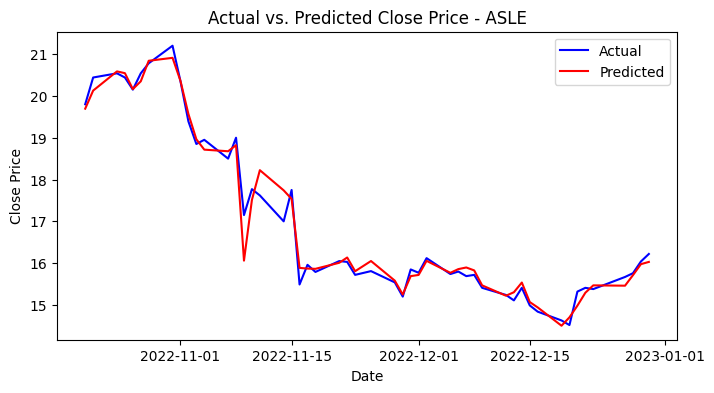

r2_score for ASLE: 0.98348
MSE for ASLE: 0.25735


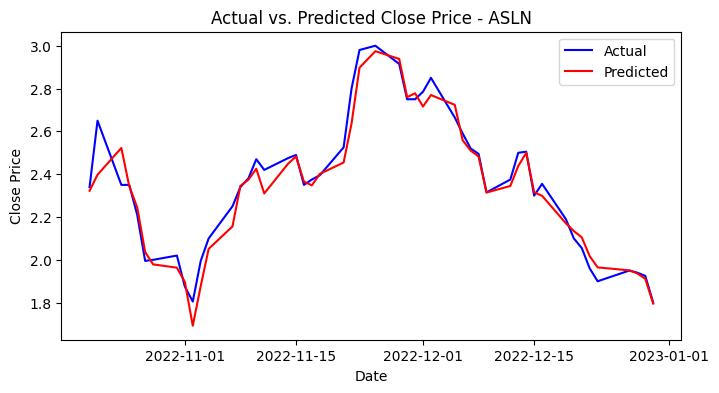

r2_score for ASLN: 0.95363
MSE for ASLN: 0.06793


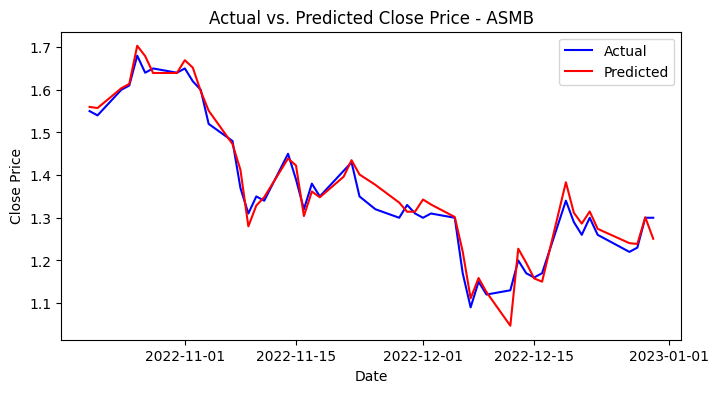

r2_score for ASMB: 0.97052
MSE for ASMB: 0.02762


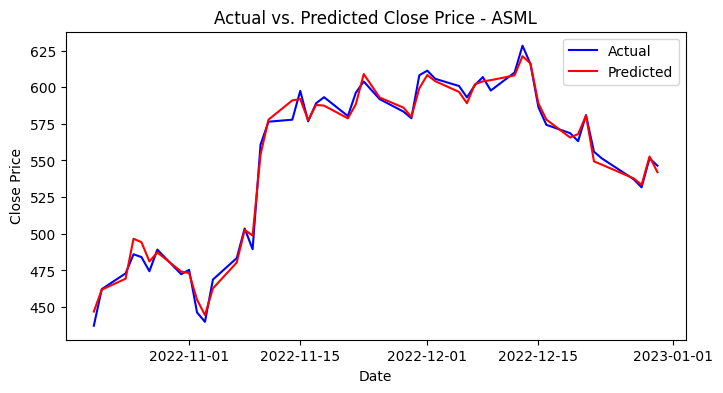

r2_score for ASML: 0.99110
MSE for ASML: 5.23527


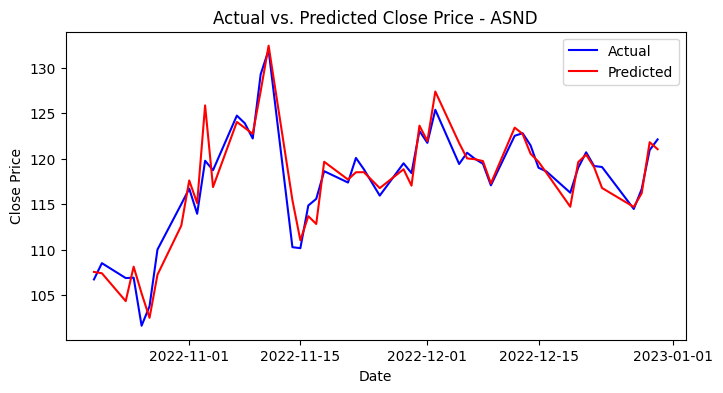

r2_score for ASND: 0.91677
MSE for ASND: 1.73849


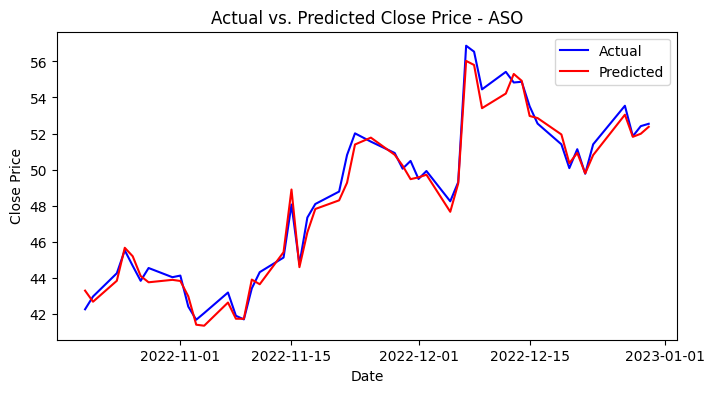

r2_score for ASO: 0.98366
MSE for ASO: 0.56640


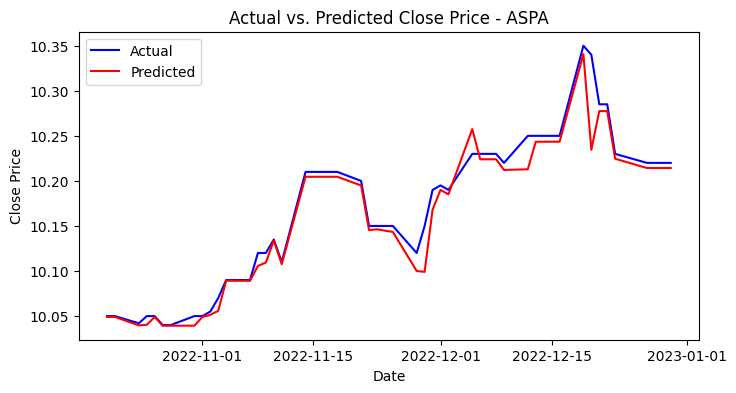

r2_score for ASPA: 0.94673
MSE for ASPA: 0.01923


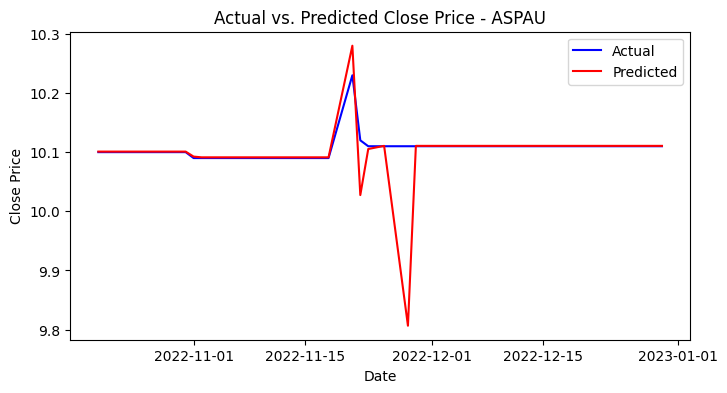

r2_score for ASPAU: -4.20468
MSE for ASPAU: 0.04545


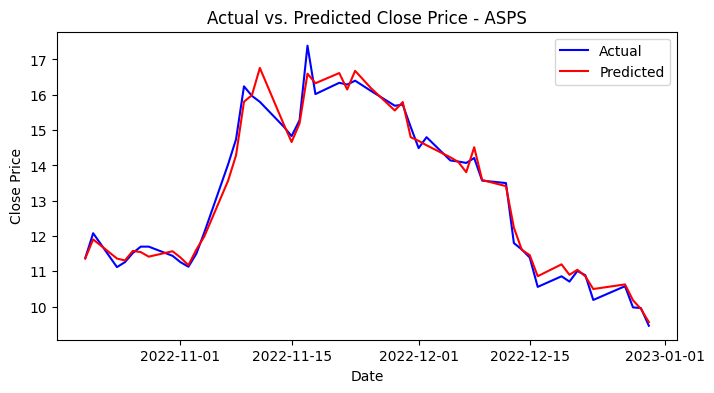

r2_score for ASPS: 0.98501
MSE for ASPS: 0.27237


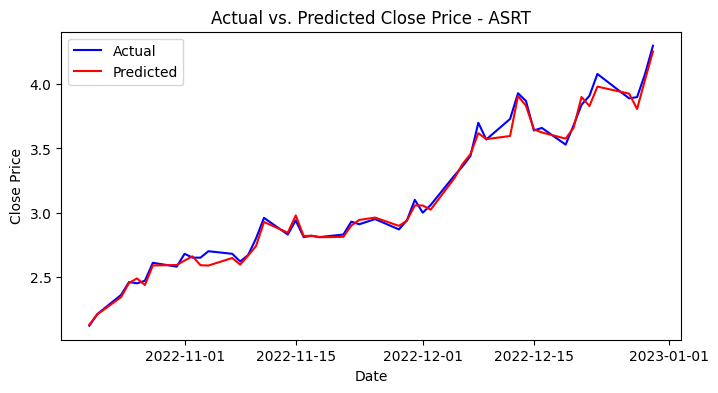

r2_score for ASRT: 0.99325
MSE for ASRT: 0.04573


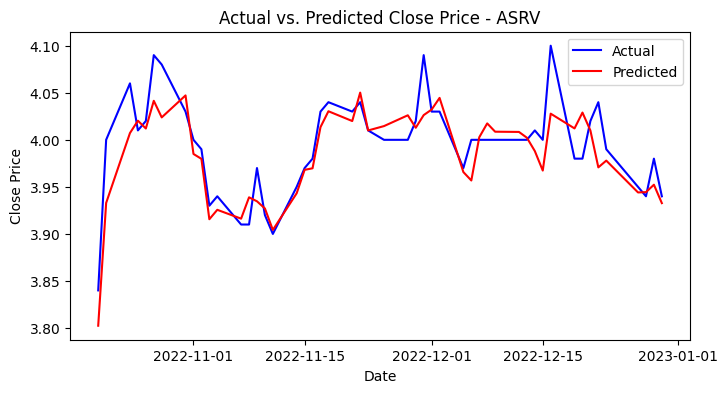

r2_score for ASRV: 0.67390
MSE for ASRV: 0.02899


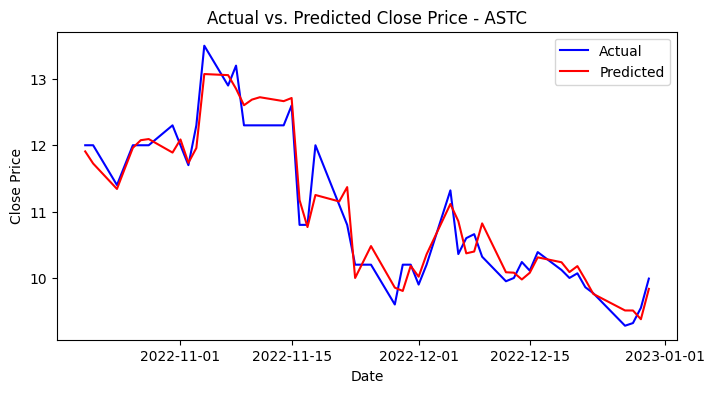

r2_score for ASTC: 0.94054
MSE for ASTC: 0.27039


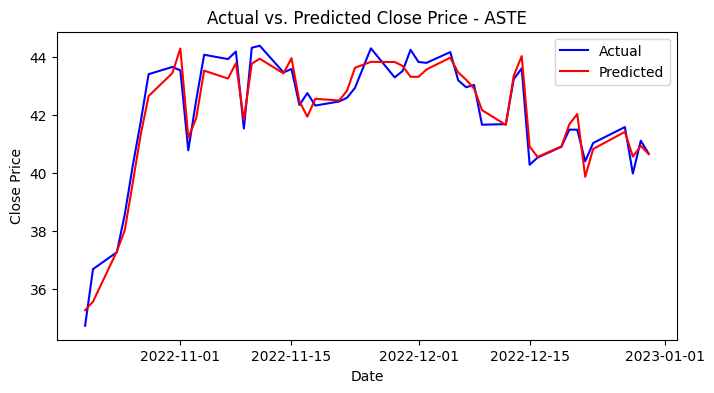

r2_score for ASTE: 0.94789
MSE for ASTE: 0.46526


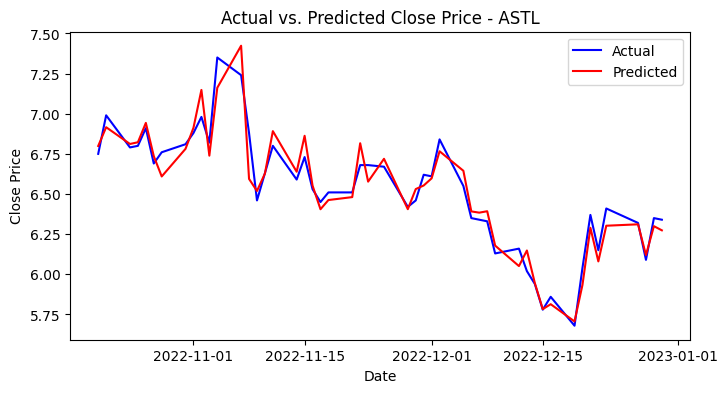

r2_score for ASTL: 0.93587
MSE for ASTL: 0.08929


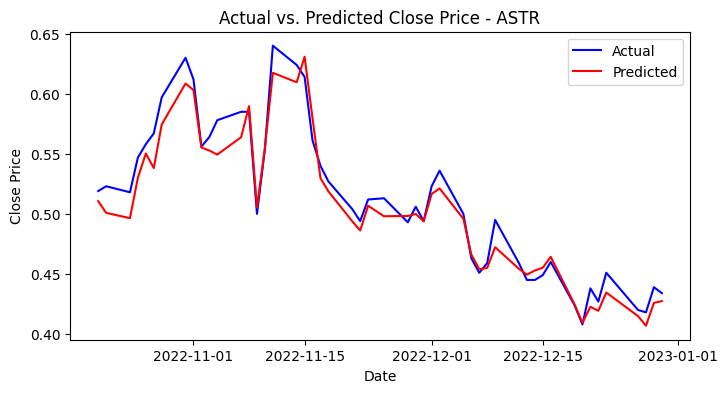

r2_score for ASTR: 0.95592
MSE for ASTR: 0.01312


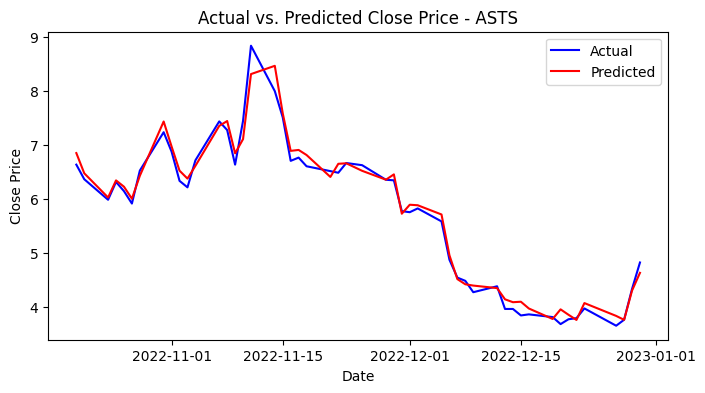

r2_score for ASTS: 0.98452
MSE for ASTS: 0.16816


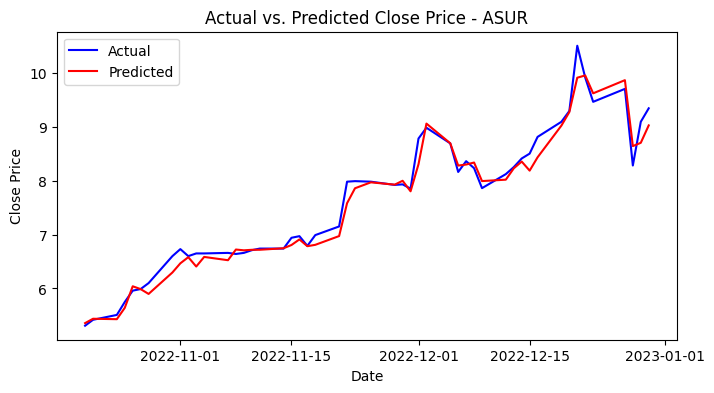

r2_score for ASUR: 0.97587
MSE for ASUR: 0.19579


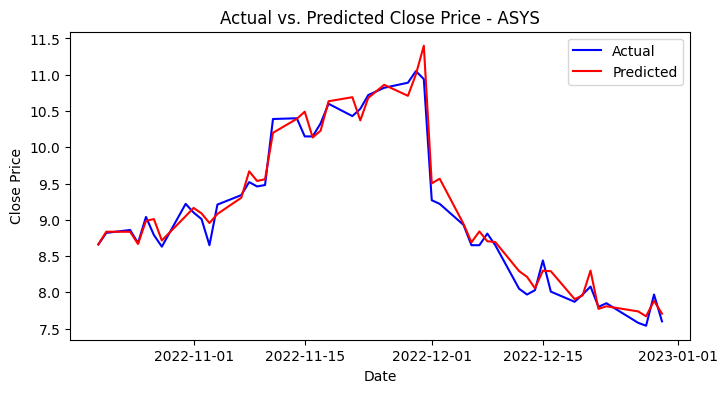

r2_score for ASYS: 0.97484
MSE for ASYS: 0.16169


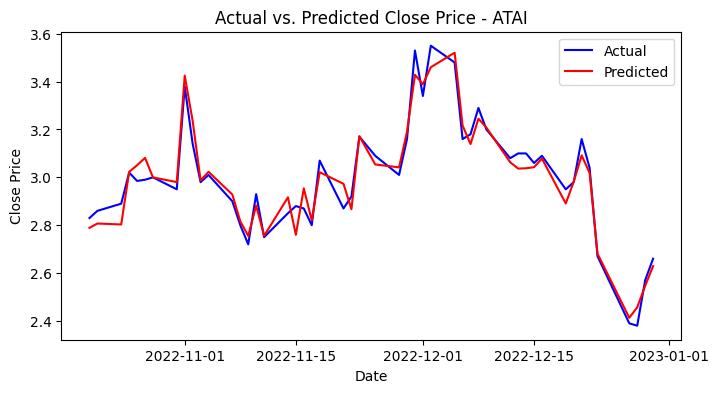

r2_score for ATAI: 0.95205
MSE for ATAI: 0.05322


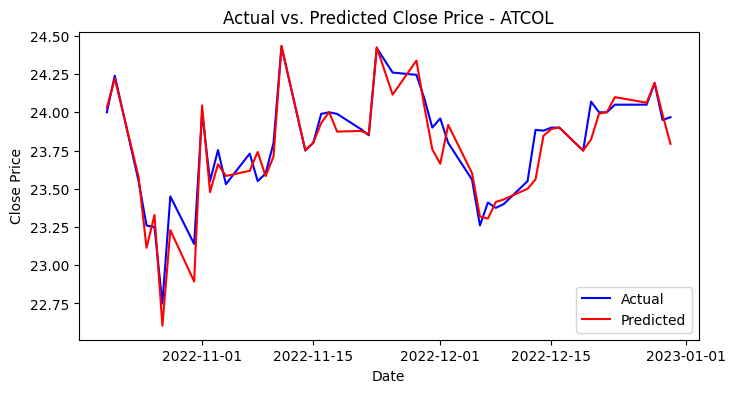

r2_score for ATCOL: 0.88943
MSE for ATCOL: 0.11220


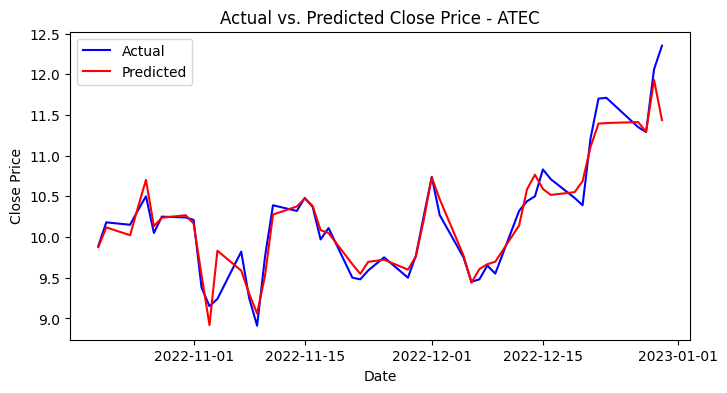

r2_score for ATEC: 0.92174
MSE for ATEC: 0.20813


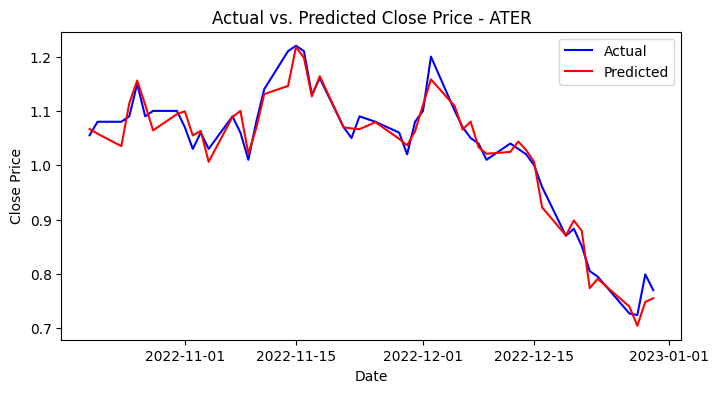

r2_score for ATER: 0.96579
MSE for ATER: 0.02246


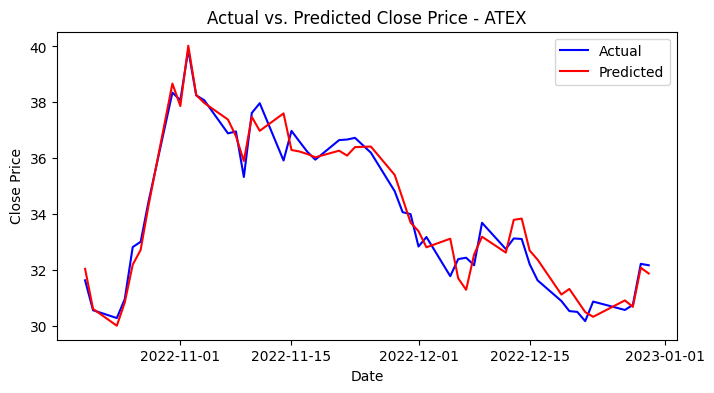

r2_score for ATEX: 0.95907
MSE for ATEX: 0.54698


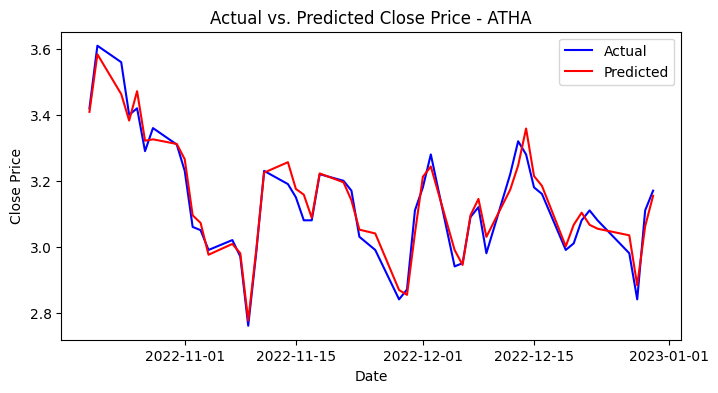

r2_score for ATHA: 0.95035
MSE for ATHA: 0.03931


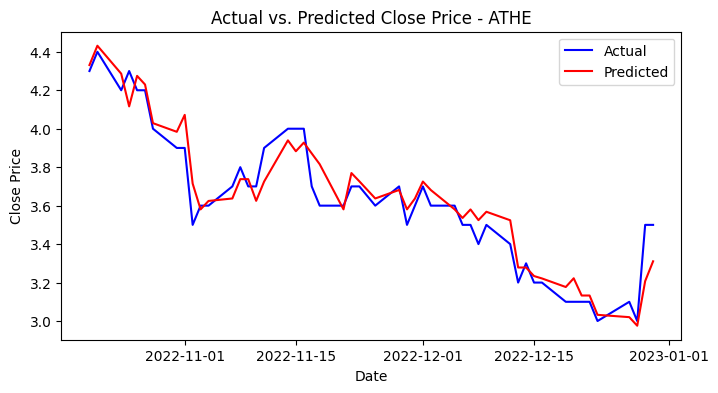

r2_score for ATHE: 0.92097
MSE for ATHE: 0.10051


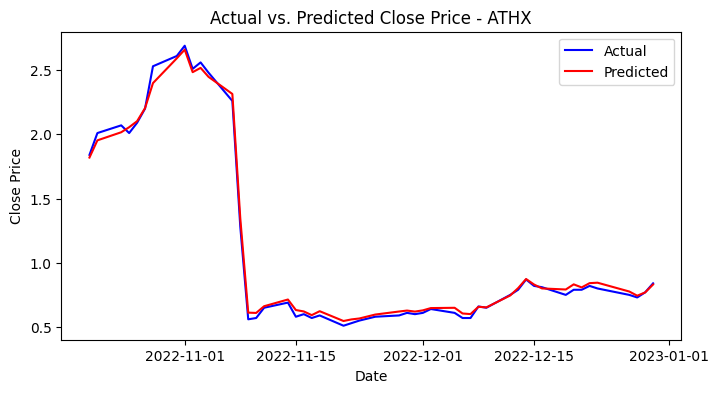

r2_score for ATHX: 0.99759
MSE for ATHX: 0.03580


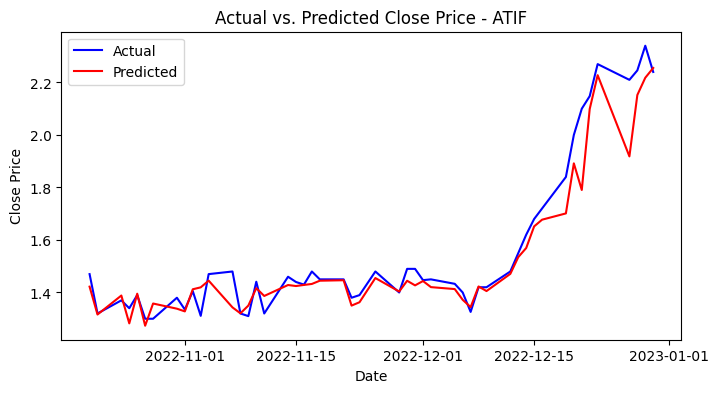

r2_score for ATIF: 0.93050
MSE for ATIF: 0.07867


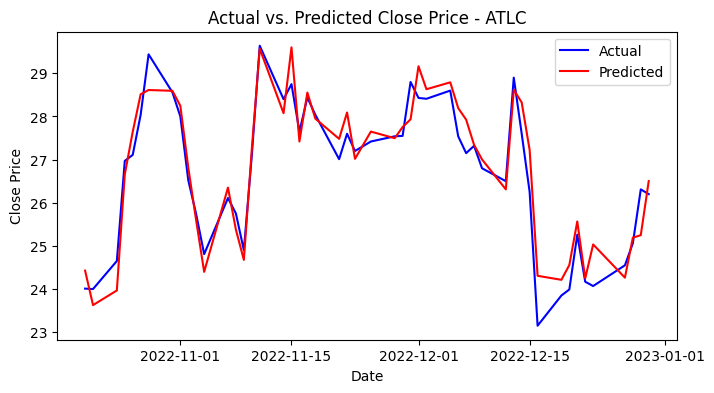

r2_score for ATLC: 0.91139
MSE for ATLC: 0.49717


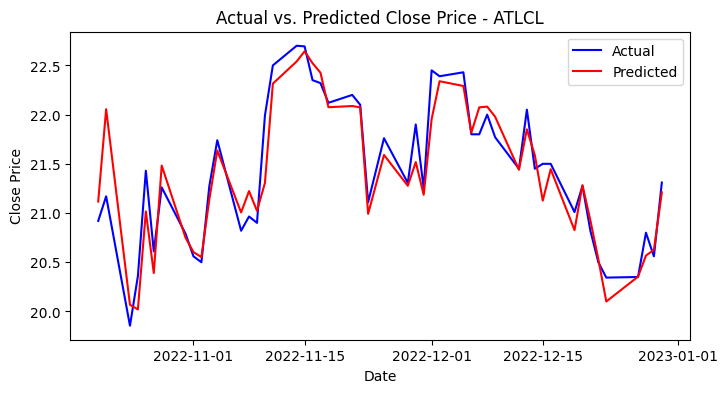

r2_score for ATLCL: 0.88192
MSE for ATLCL: 0.24296


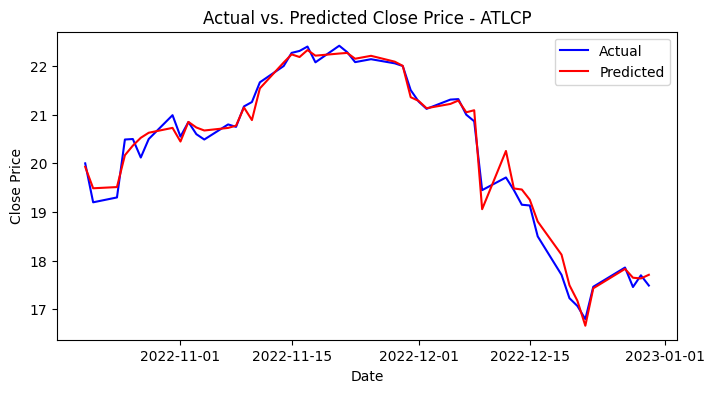

r2_score for ATLCP: 0.98592
MSE for ATLCP: 0.19560


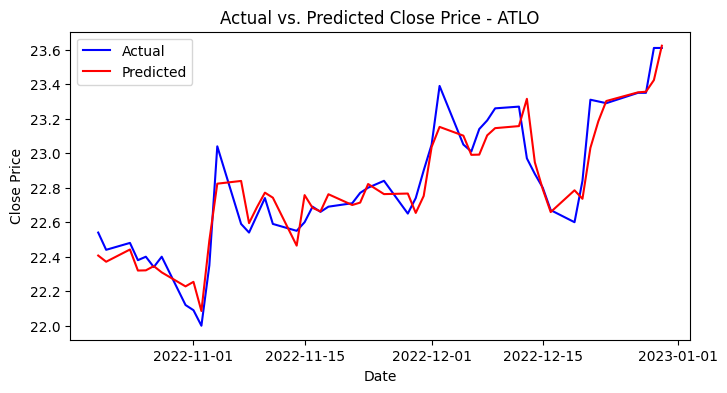

r2_score for ATLO: 0.89666
MSE for ATLO: 0.12224


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

mse_Linear_list = []
r2_score_Linear_list = []

for ticker in company_list:
    ticker_data = company_data[ticker]

    train_data = ticker_data.iloc[:-50]
    test_data = ticker_data.iloc[-50:]
    
    X_train, y_train = train_data[['open', 'high', 'low', 'volume']], train_data['close']
    X_test, y_test = test_data[['open', 'high', 'low', 'volume']], test_data['close']

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    dates_test = data.iloc[X_test.index]['date']
    
    plt.figure(figsize=(8,4))
    plt.plot(dates_test, y_test, label='Actual', color='blue')
    plt.plot(dates_test, y_pred, label='Predicted', color='red')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Actual vs. Predicted Close Price - {ticker}')
    plt.legend()
    plt.show()
    
    r2_score_Linear = r2_score(y_test, y_pred)
    mse_Linear = mean_squared_error(y_test, y_pred, squared=False)
    r2_score_Linear_list.append(r2_score_Linear)
    mse_Linear_list.append(mse_Linear)
    print(f'r2_score for {ticker}: {r2_score_Linear:.5f}')
    print(f'MSE for {ticker}: {mse_Linear:.5f}')

# Ridge Regression

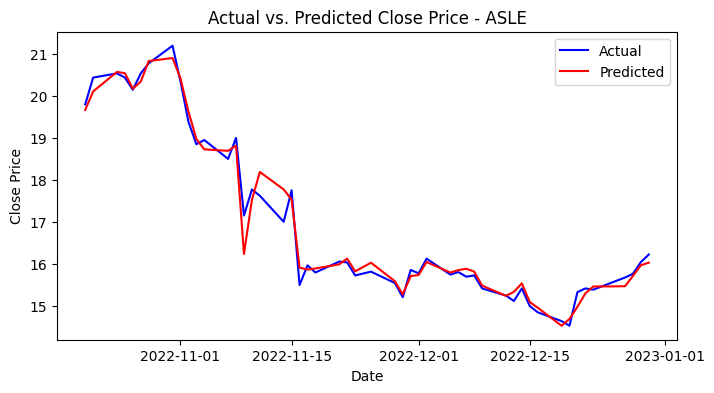

r2_score for ASLE: 0.98482
MSE for ASLE: 0.24667


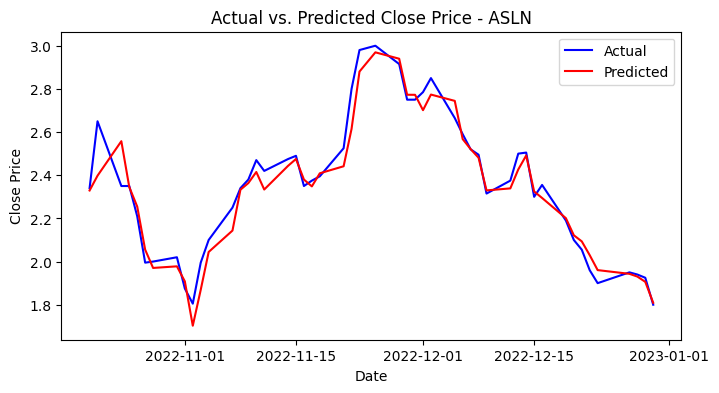

r2_score for ASLN: 0.94635
MSE for ASLN: 0.07307


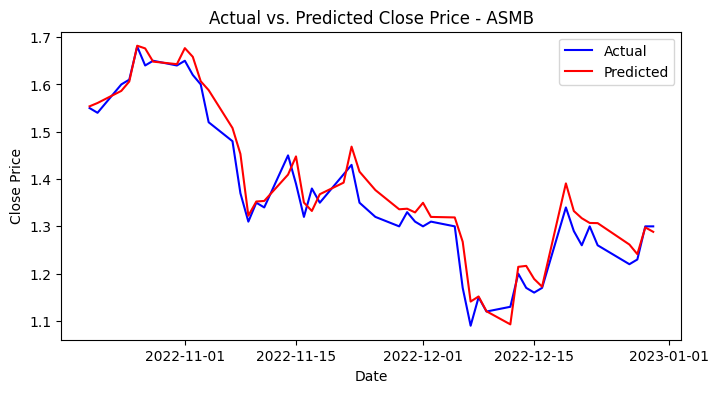

r2_score for ASMB: 0.94756
MSE for ASMB: 0.03684


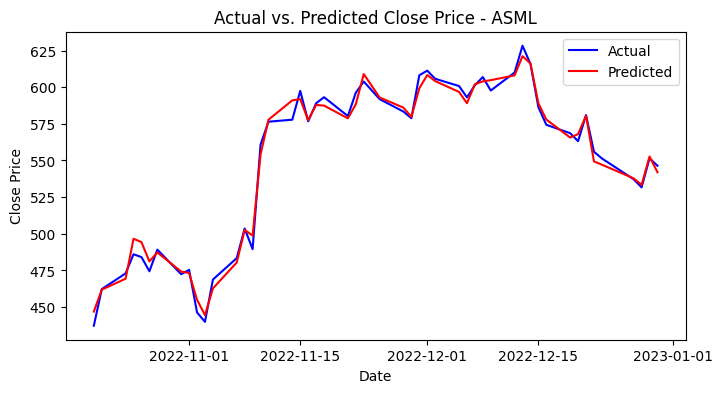

r2_score for ASML: 0.99110
MSE for ASML: 5.23502


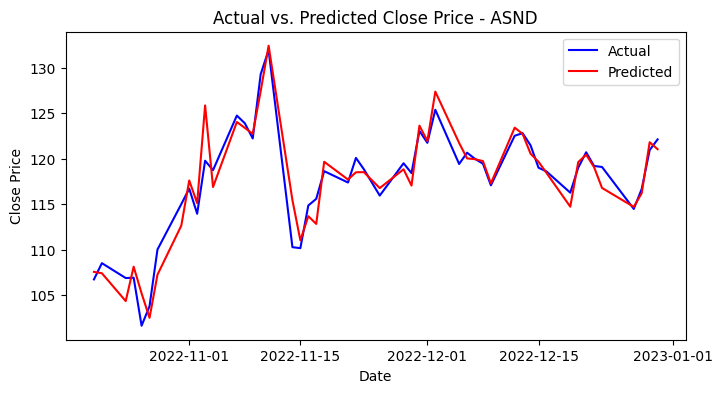

r2_score for ASND: 0.91683
MSE for ASND: 1.73790


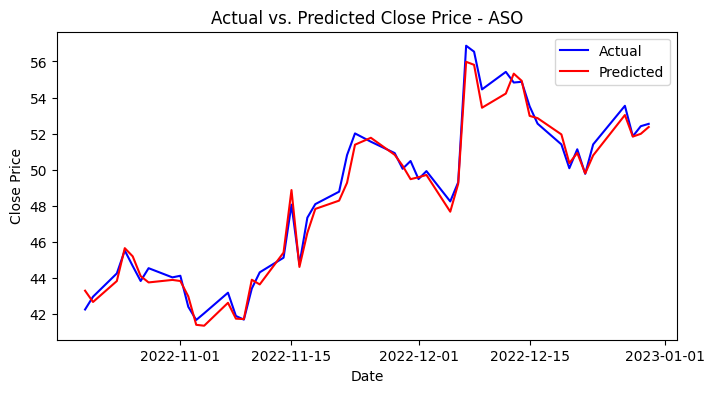

r2_score for ASO: 0.98365
MSE for ASO: 0.56671


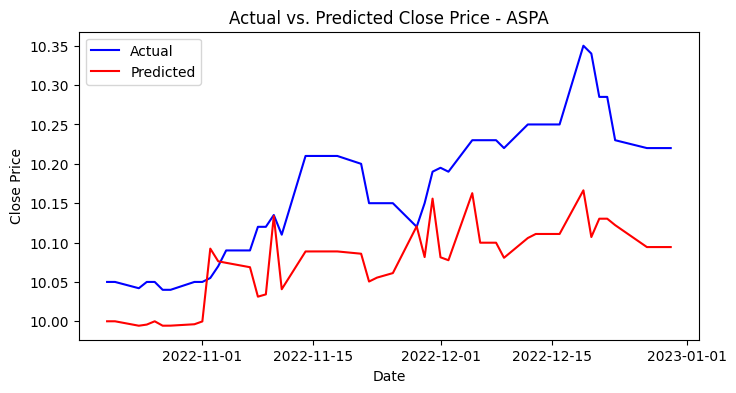

r2_score for ASPA: -0.65018
MSE for ASPA: 0.10703


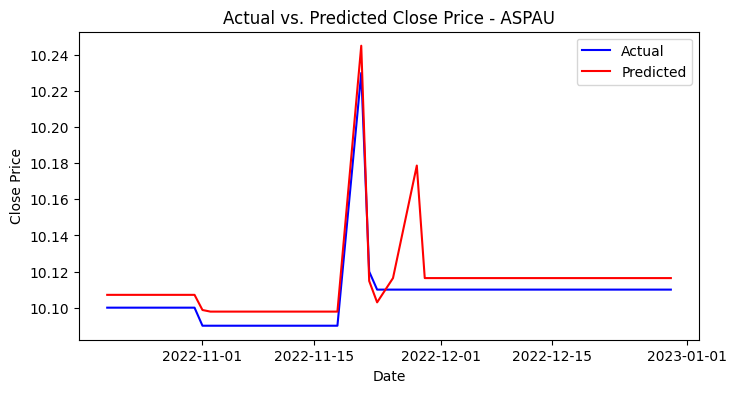

r2_score for ASPAU: 0.63323
MSE for ASPAU: 0.01206


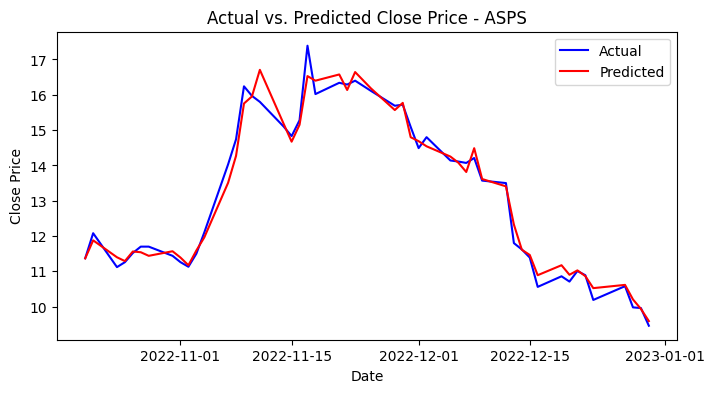

r2_score for ASPS: 0.98388
MSE for ASPS: 0.28240


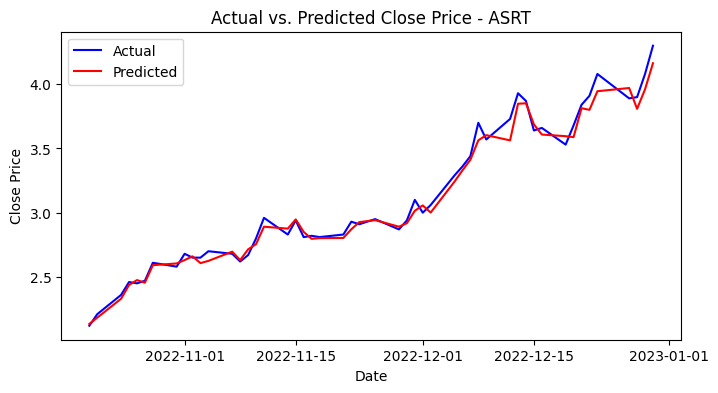

r2_score for ASRT: 0.98698
MSE for ASRT: 0.06353


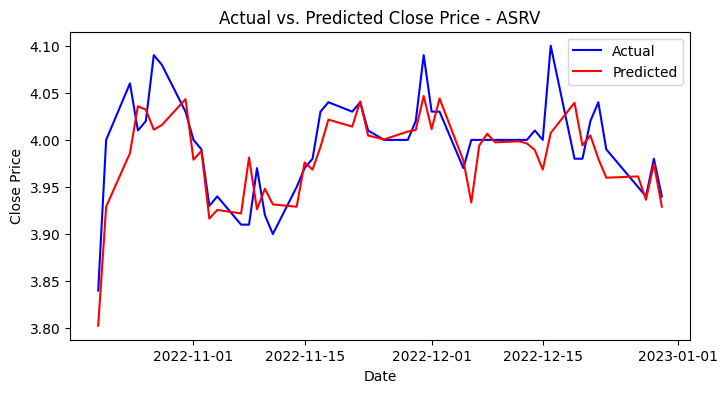

r2_score for ASRV: 0.52173
MSE for ASRV: 0.03510


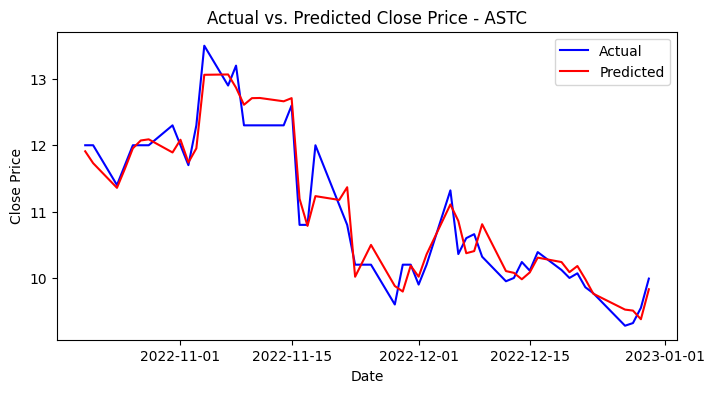

r2_score for ASTC: 0.93929
MSE for ASTC: 0.27321


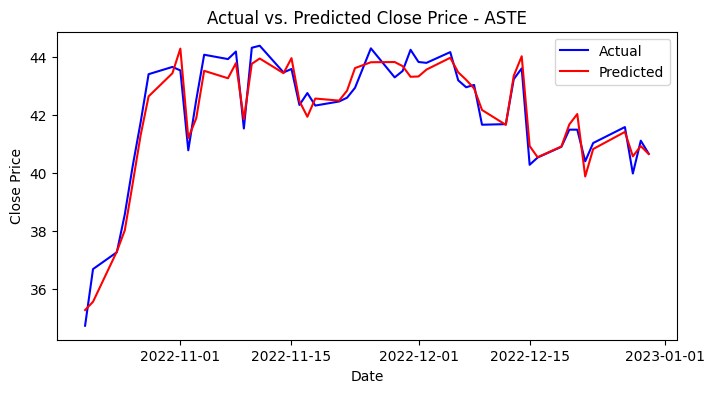

r2_score for ASTE: 0.94754
MSE for ASTE: 0.46683


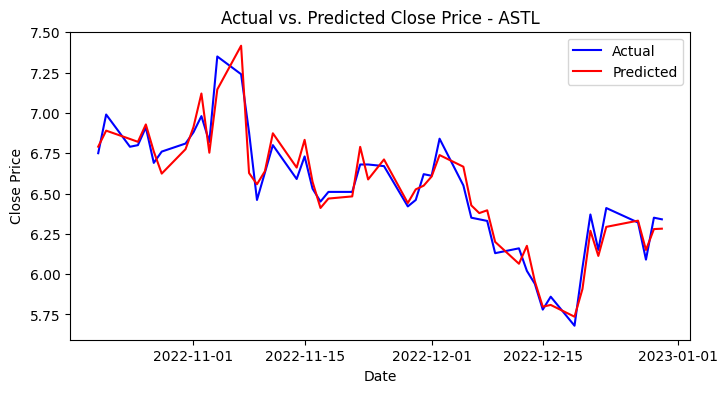

r2_score for ASTL: 0.93479
MSE for ASTL: 0.09004


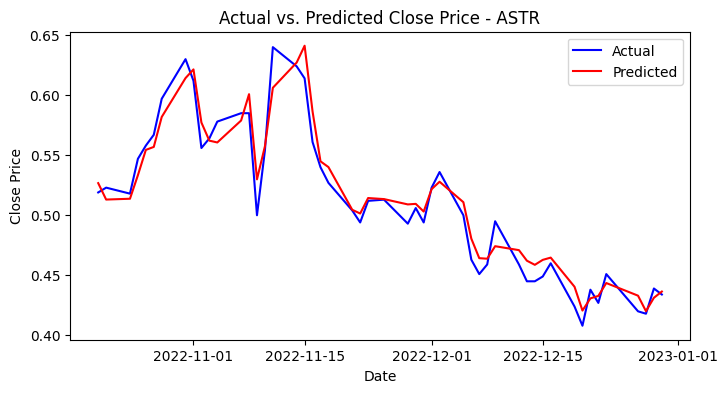

r2_score for ASTR: 0.95432
MSE for ASTR: 0.01336


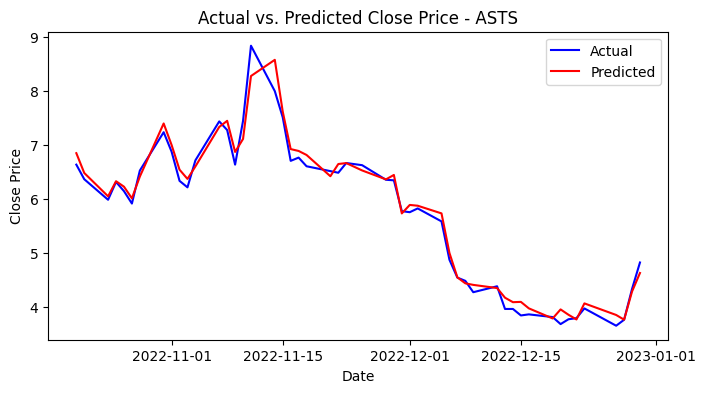

r2_score for ASTS: 0.98220
MSE for ASTS: 0.18036


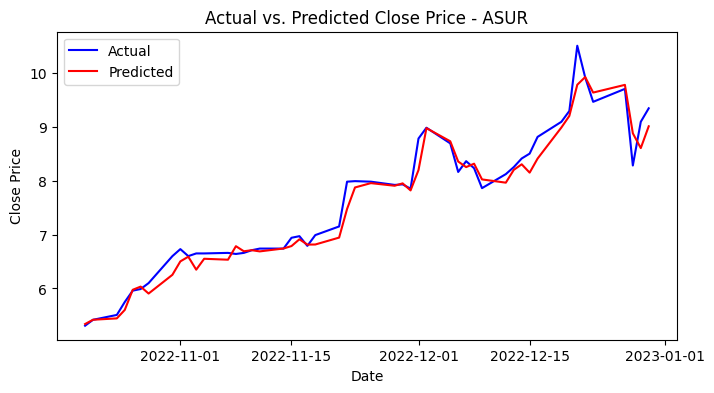

r2_score for ASUR: 0.96492
MSE for ASUR: 0.23605


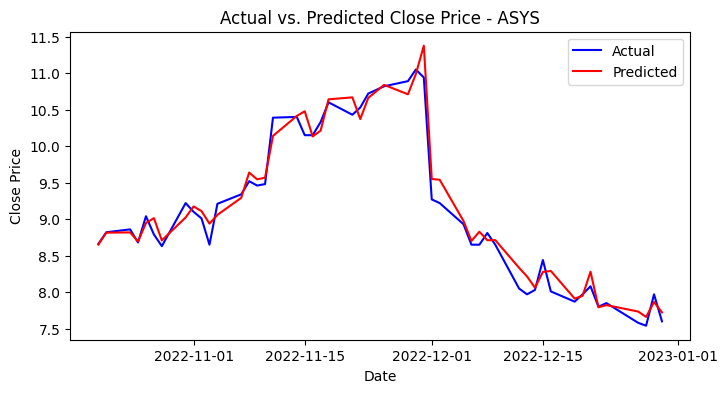

r2_score for ASYS: 0.97420
MSE for ASYS: 0.16371


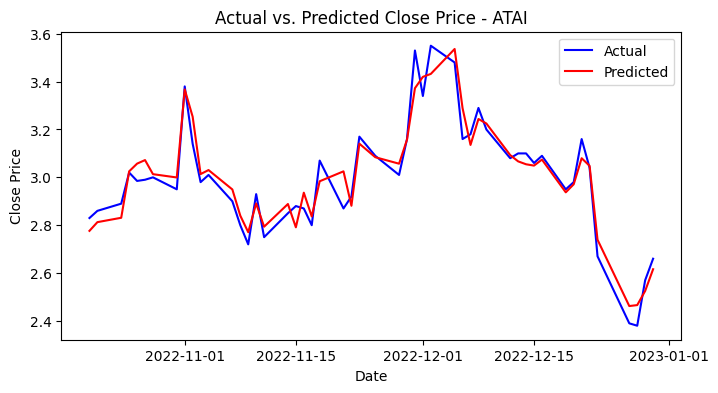

r2_score for ATAI: 0.93216
MSE for ATAI: 0.06330


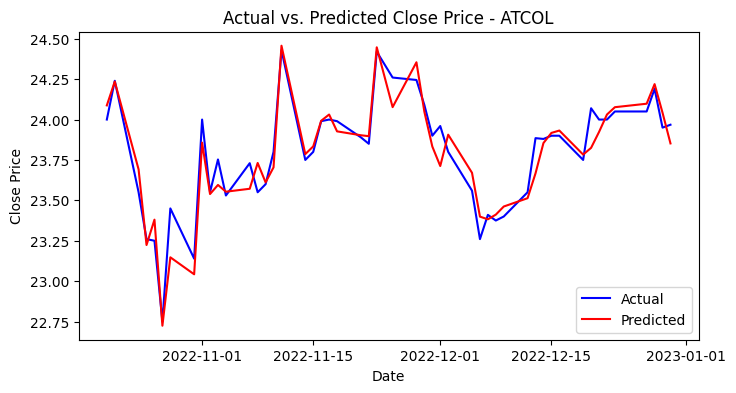

r2_score for ATCOL: 0.89832
MSE for ATCOL: 0.10759


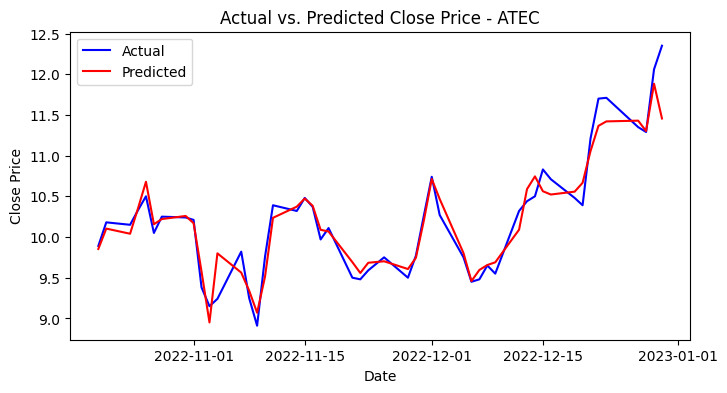

r2_score for ATEC: 0.92107
MSE for ATEC: 0.20901


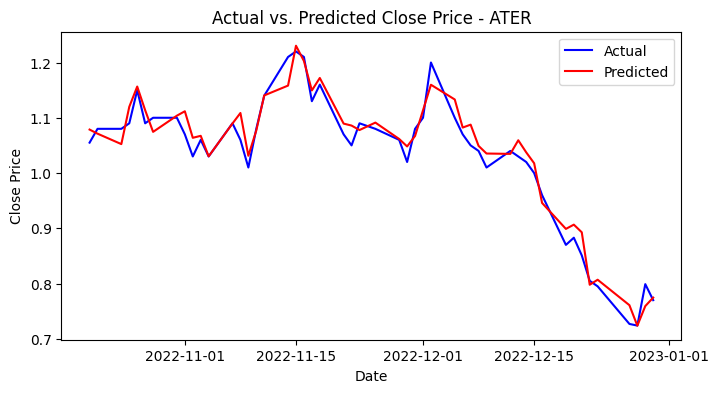

r2_score for ATER: 0.96124
MSE for ATER: 0.02391


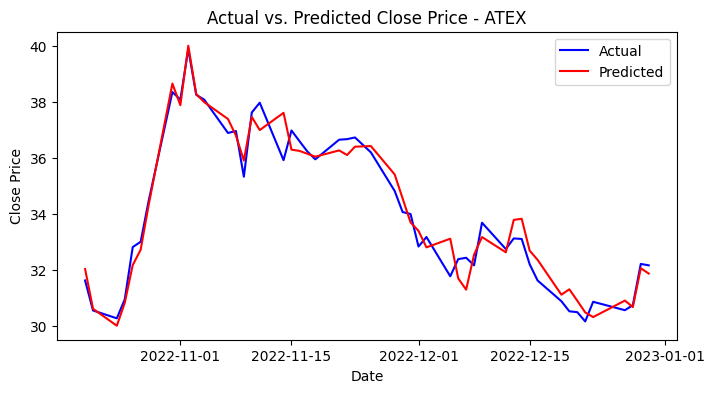

r2_score for ATEX: 0.95923
MSE for ATEX: 0.54588


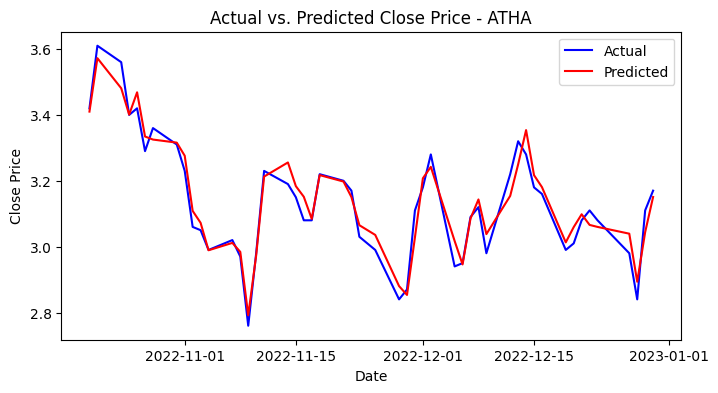

r2_score for ATHA: 0.94333
MSE for ATHA: 0.04199


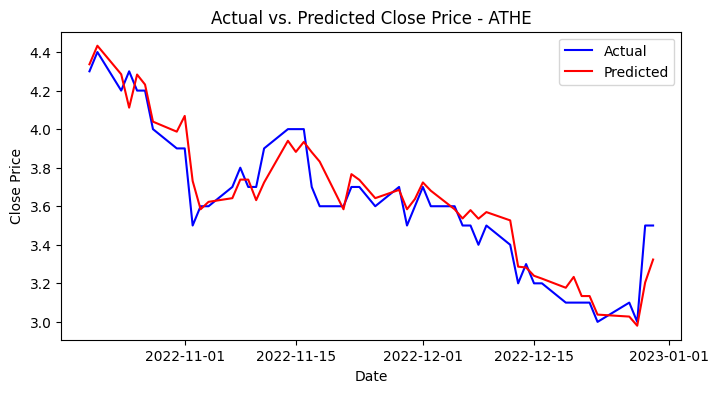

r2_score for ATHE: 0.91715
MSE for ATHE: 0.10291


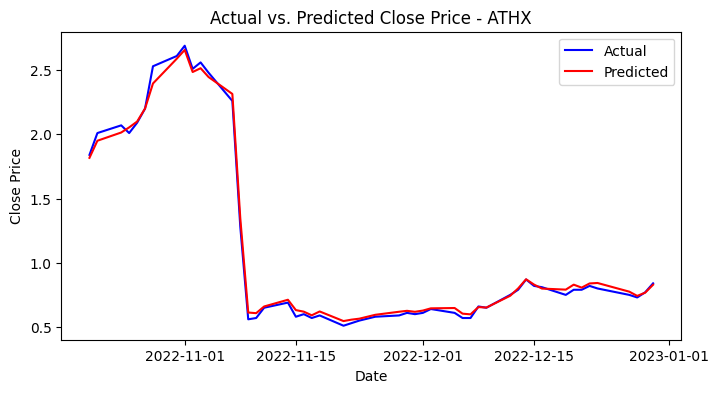

r2_score for ATHX: 0.99760
MSE for ATHX: 0.03572


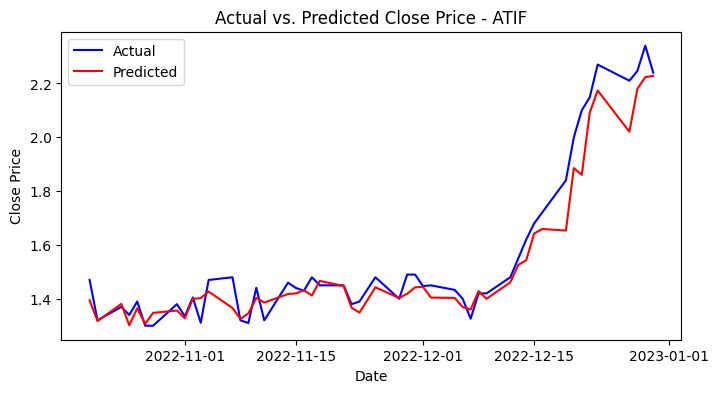

r2_score for ATIF: 0.94422
MSE for ATIF: 0.07048


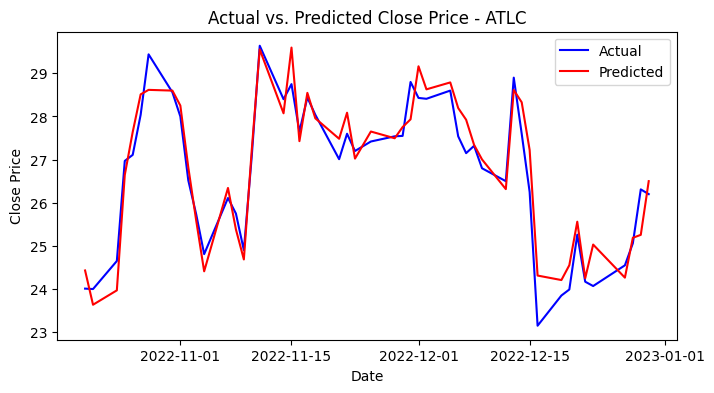

r2_score for ATLC: 0.91184
MSE for ATLC: 0.49591


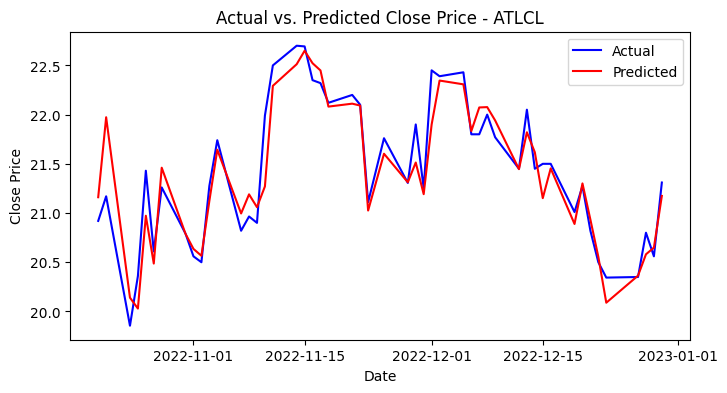

r2_score for ATLCL: 0.88186
MSE for ATLCL: 0.24303


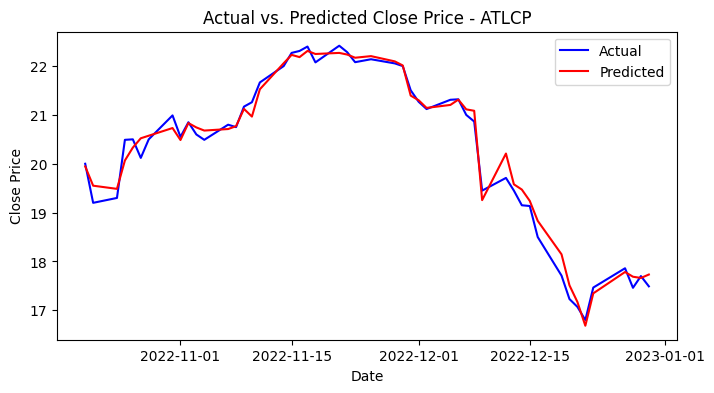

r2_score for ATLCP: 0.98592
MSE for ATLCP: 0.19563


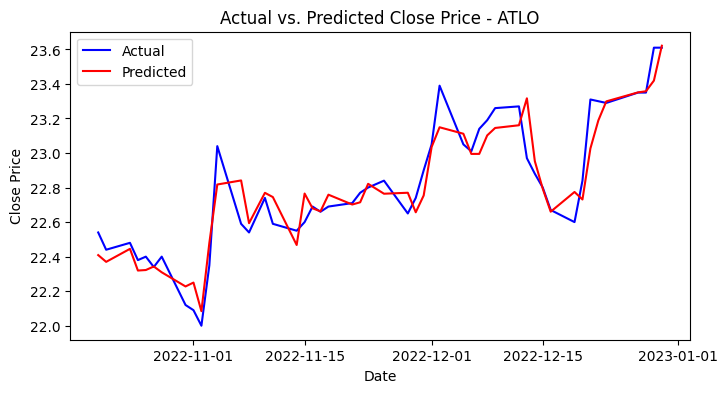

r2_score for ATLO: 0.89643
MSE for ATLO: 0.12238


In [17]:
from sklearn.linear_model import Ridge
mse_Ridge_list = []
r2_score_Ridge_list = []

for ticker in company_list:
    ticker_data = company_data[ticker]

    train_data = ticker_data.iloc[:-50]
    test_data = ticker_data.iloc[-50:]
    
    X_train, y_train = train_data[['open', 'high', 'low', 'volume']], train_data['close']
    X_test, y_test = test_data[['open', 'high', 'low', 'volume']], test_data['close']

    model = Ridge()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    dates_test = data.iloc[X_test.index]['date']
    
    plt.figure(figsize=(8, 4))
    plt.plot(dates_test, y_test, label='Actual', color='blue')
    plt.plot(dates_test, y_pred, label='Predicted', color='red')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Actual vs. Predicted Close Price - {ticker}')
    plt.legend()
    plt.show()
    
    r2_score_Ridge = r2_score(y_test, y_pred)
    mse_Ridge = mean_squared_error(y_test, y_pred, squared=False)
    r2_score_Ridge_list.append(r2_score_Ridge)
    mse_Ridge_list.append(mse_Ridge)
    print(f'r2_score for {ticker}: {r2_score_Ridge:.5f}')
    print(f'MSE for {ticker}: {mse_Ridge:.5f}')

# Random Forest Regression

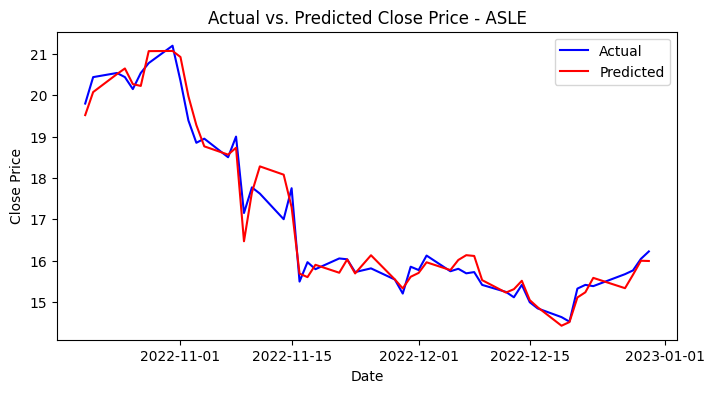

r2_score for ASLE: 0.97487
MSE for ASLE: 0.31740


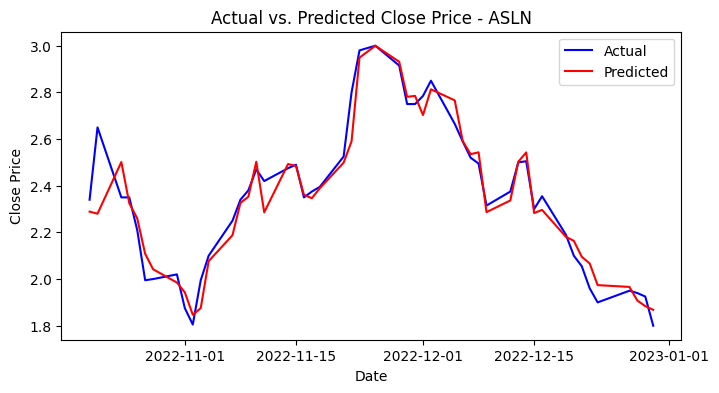

r2_score for ASLN: 0.93283
MSE for ASLN: 0.08176


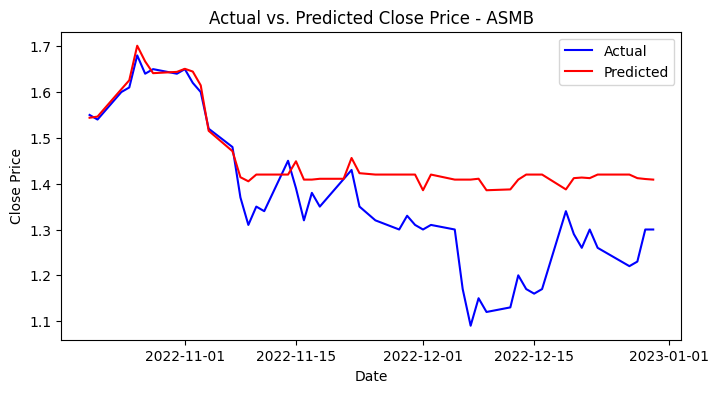

r2_score for ASMB: 0.30506
MSE for ASMB: 0.13410


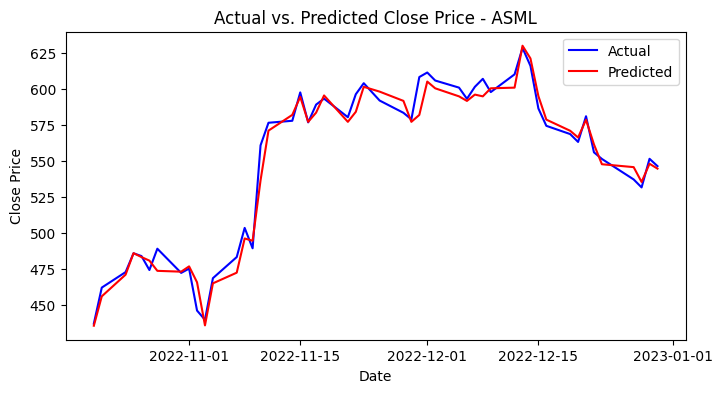

r2_score for ASML: 0.97896
MSE for ASML: 8.04779


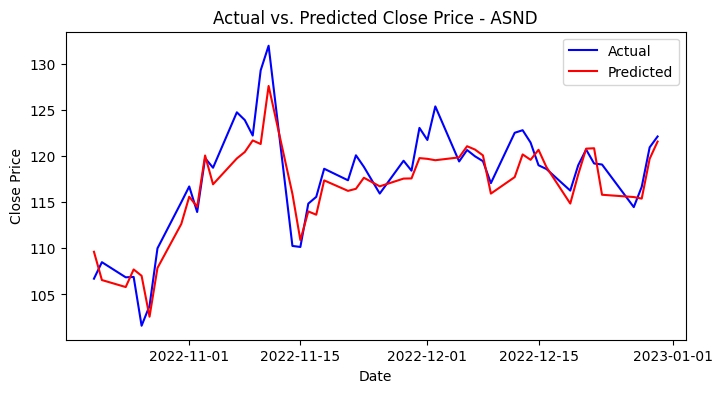

r2_score for ASND: 0.80819
MSE for ASND: 2.63921


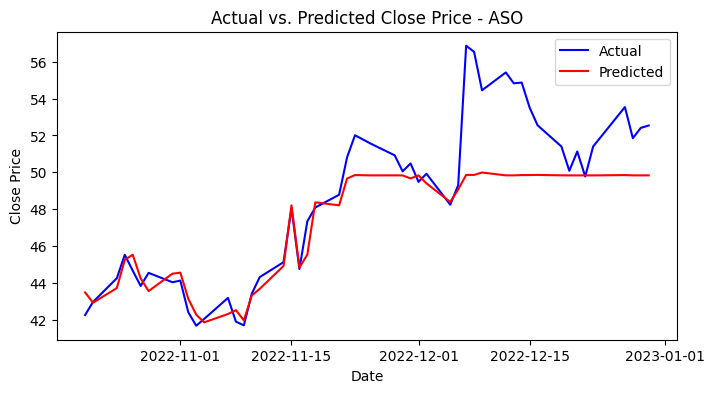

r2_score for ASO: 0.71891
MSE for ASO: 2.34940


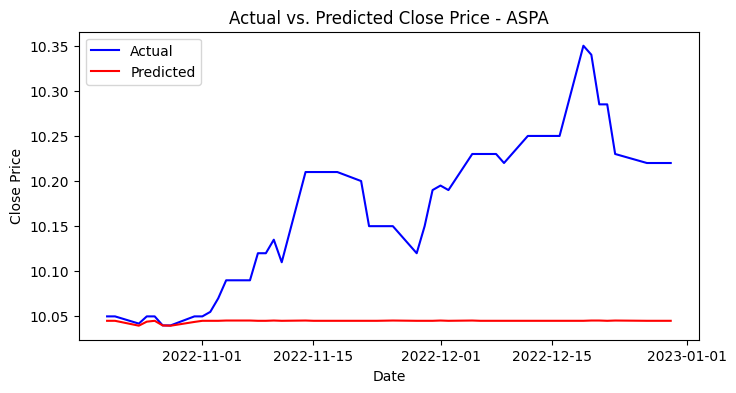

r2_score for ASPA: -2.25673
MSE for ASPA: 0.15036


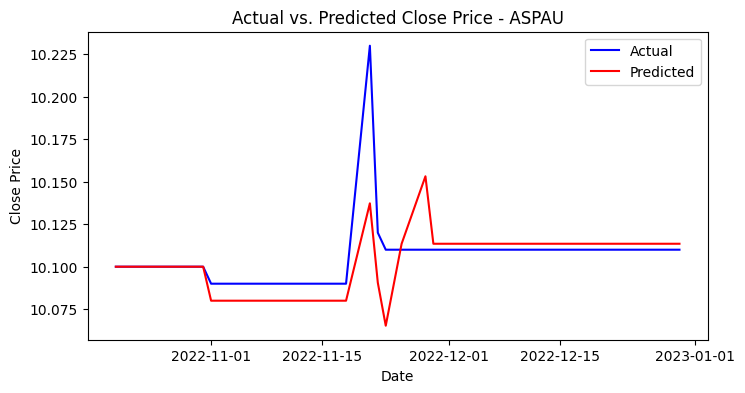

r2_score for ASPAU: 0.24316
MSE for ASPAU: 0.01733


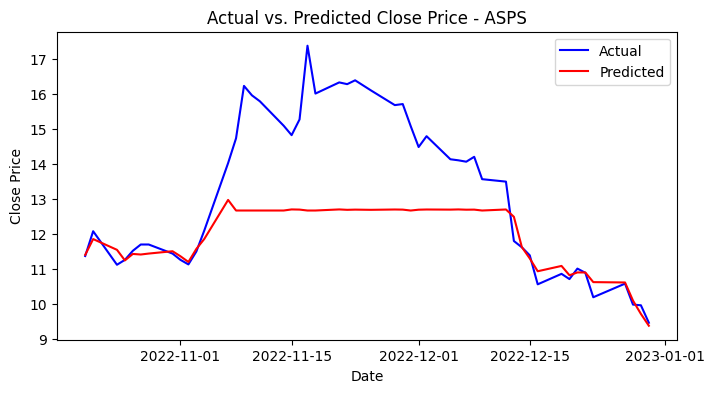

r2_score for ASPS: 0.25836
MSE for ASPS: 1.91562


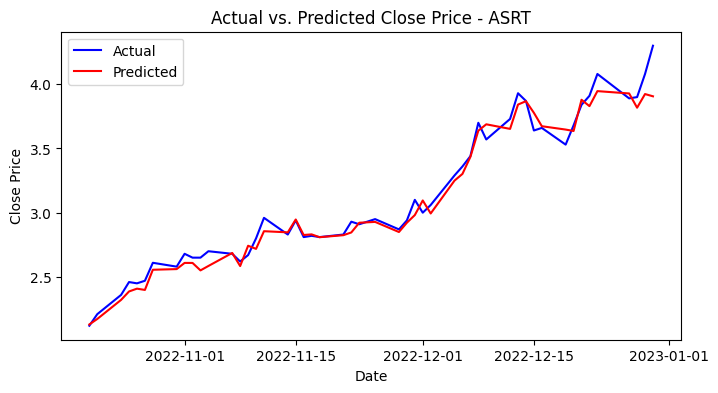

r2_score for ASRT: 0.97458
MSE for ASRT: 0.08877


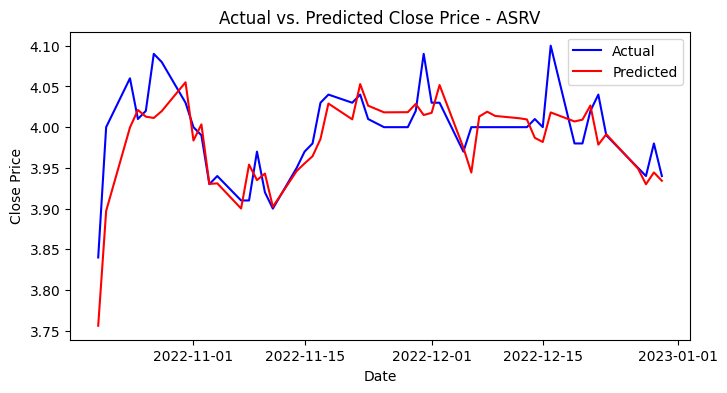

r2_score for ASRV: 0.49492
MSE for ASRV: 0.03607


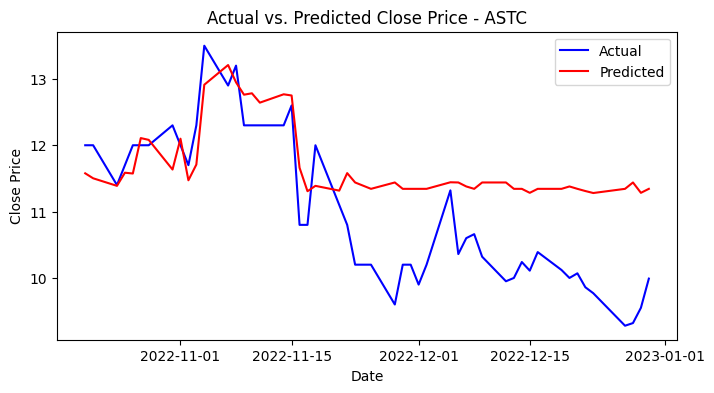

r2_score for ASTC: 0.16941
MSE for ASTC: 1.01058


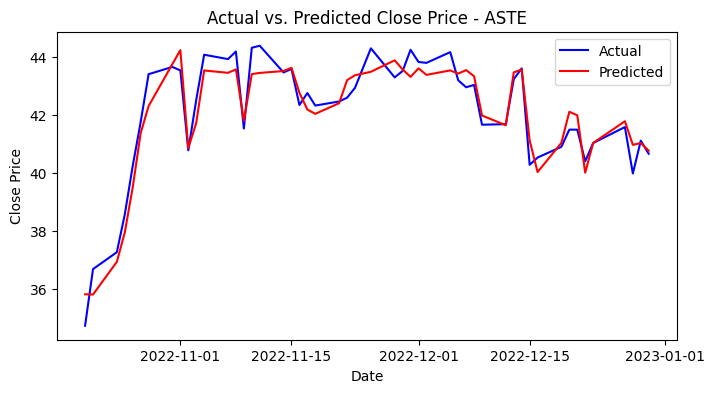

r2_score for ASTE: 0.92694
MSE for ASTE: 0.55091


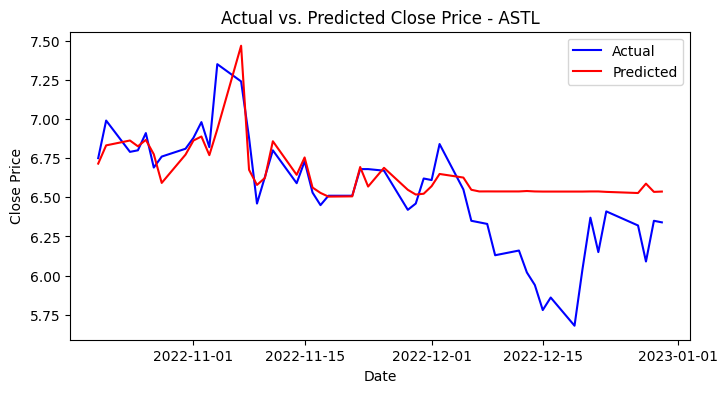

r2_score for ASTL: 0.34237
MSE for ASTL: 0.28591


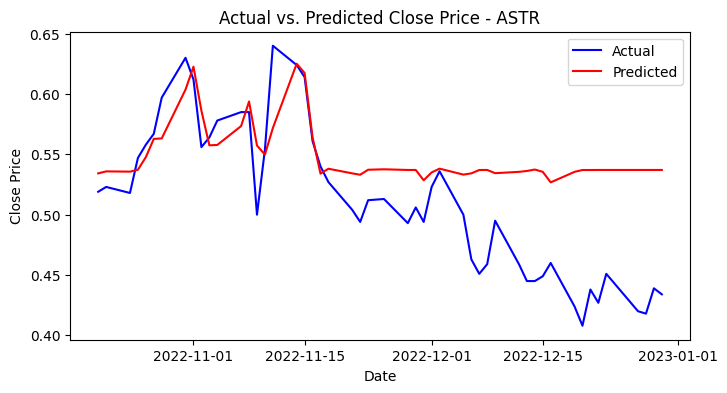

r2_score for ASTR: 0.06352
MSE for ASTR: 0.06048


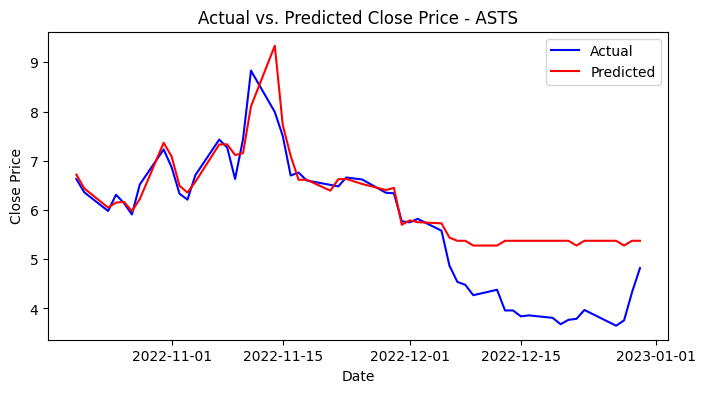

r2_score for ASTS: 0.62426
MSE for ASTS: 0.82859


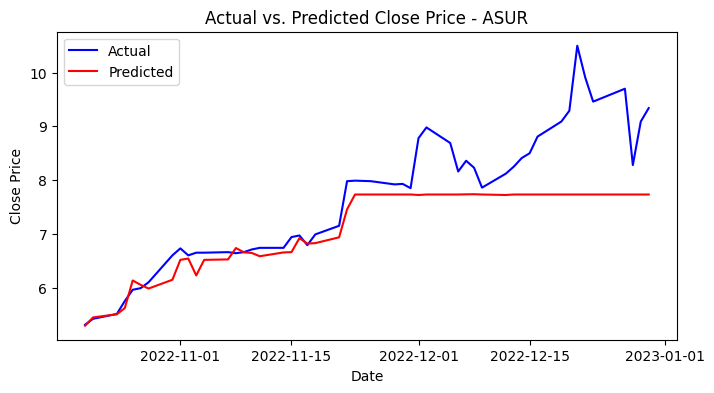

r2_score for ASUR: 0.53987
MSE for ASUR: 0.85494


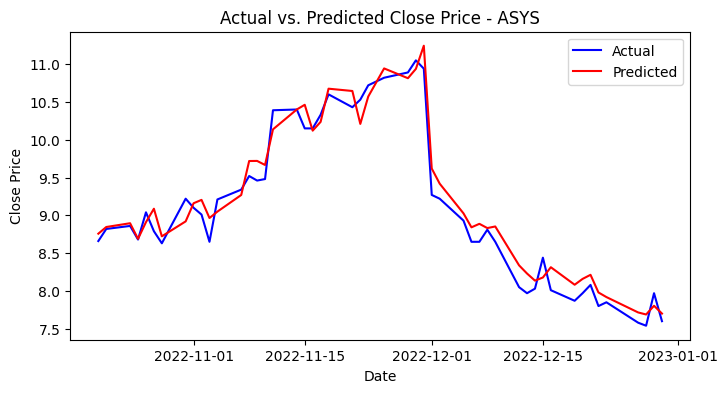

r2_score for ASYS: 0.96449
MSE for ASYS: 0.19207


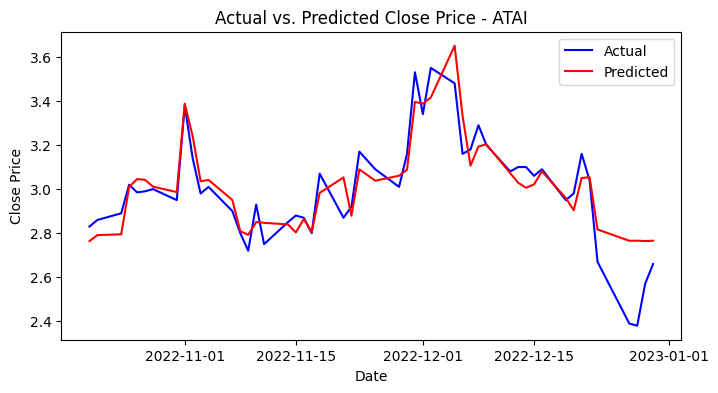

r2_score for ATAI: 0.78494
MSE for ATAI: 0.11271


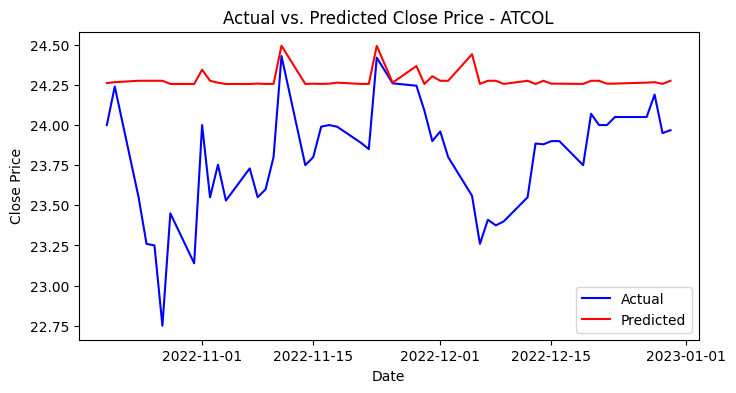

r2_score for ATCOL: -2.01142
MSE for ATCOL: 0.58552


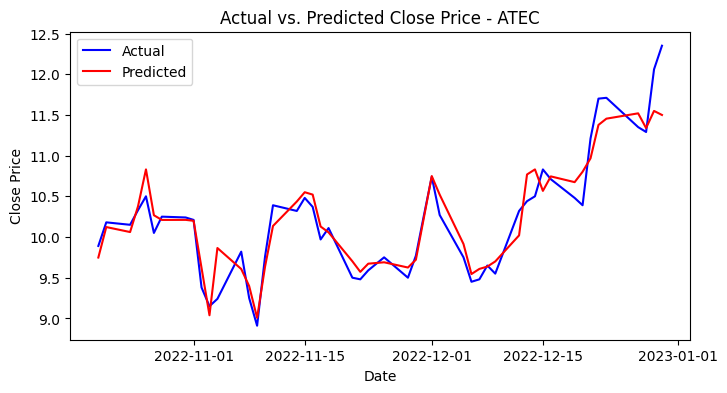

r2_score for ATEC: 0.89433
MSE for ATEC: 0.24184


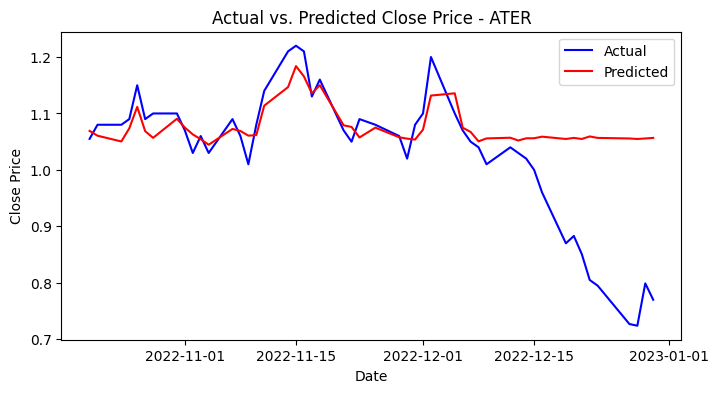

r2_score for ATER: 0.11683
MSE for ATER: 0.11410


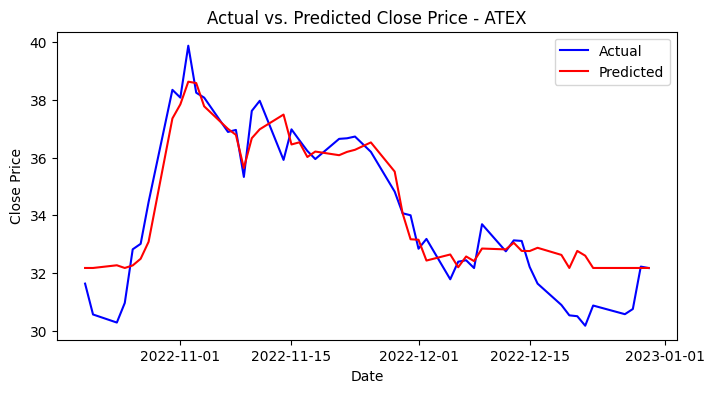

r2_score for ATEX: 0.86942
MSE for ATEX: 0.97700


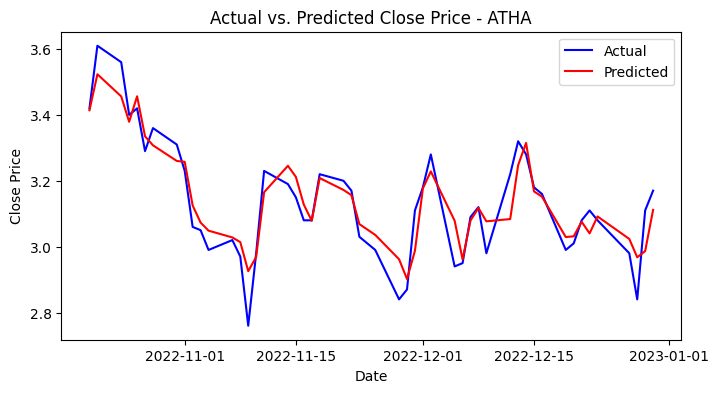

r2_score for ATHA: 0.86159
MSE for ATHA: 0.06563


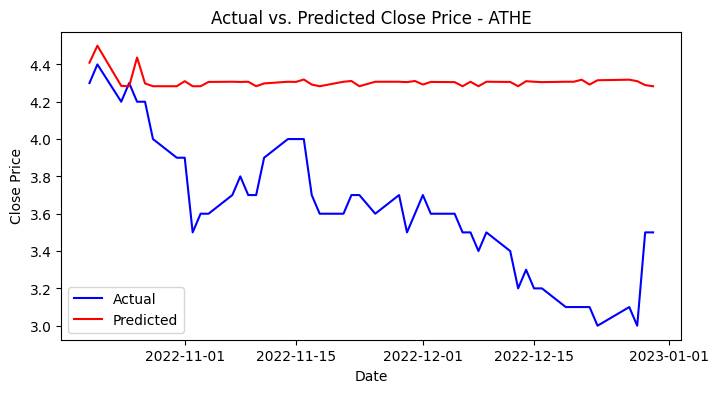

r2_score for ATHE: -3.59770
MSE for ATHE: 0.76661


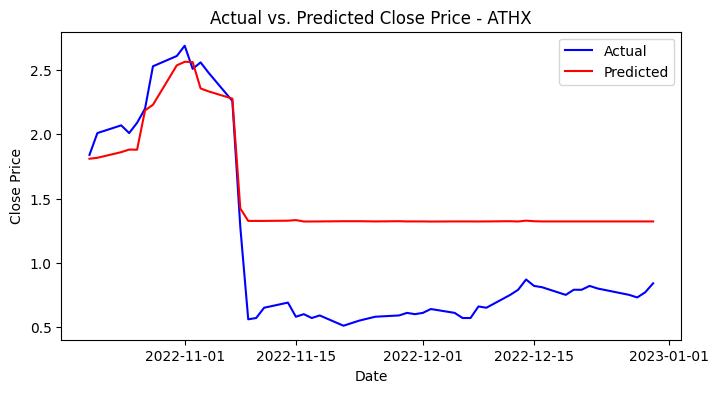

r2_score for ATHX: 0.39744
MSE for ATHX: 0.56609


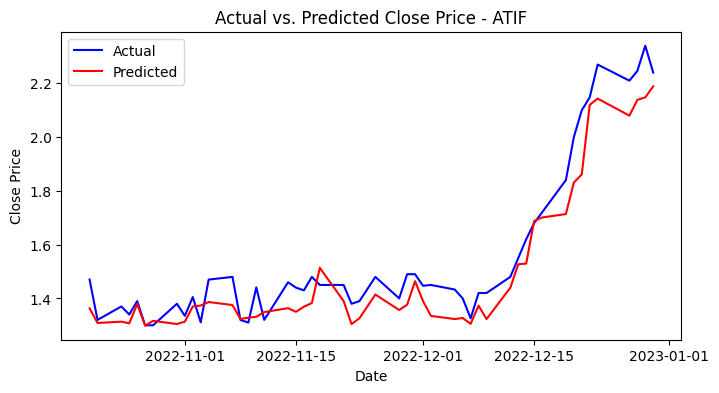

r2_score for ATIF: 0.91707
MSE for ATIF: 0.08594


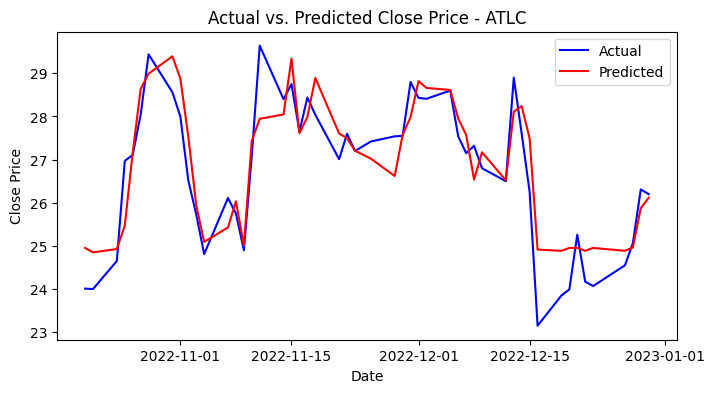

r2_score for ATLC: 0.82191
MSE for ATLC: 0.70481


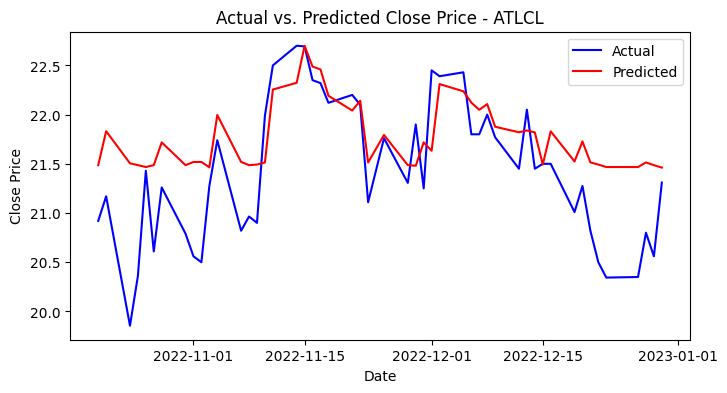

r2_score for ATLCL: 0.29417
MSE for ATLCL: 0.59402


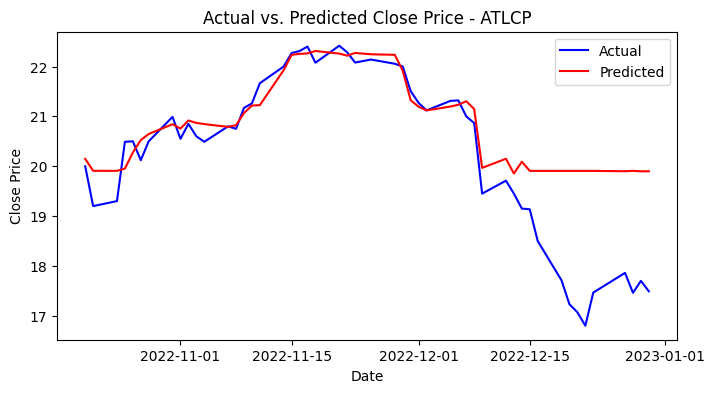

r2_score for ATLCP: 0.53771
MSE for ATLCP: 1.12085


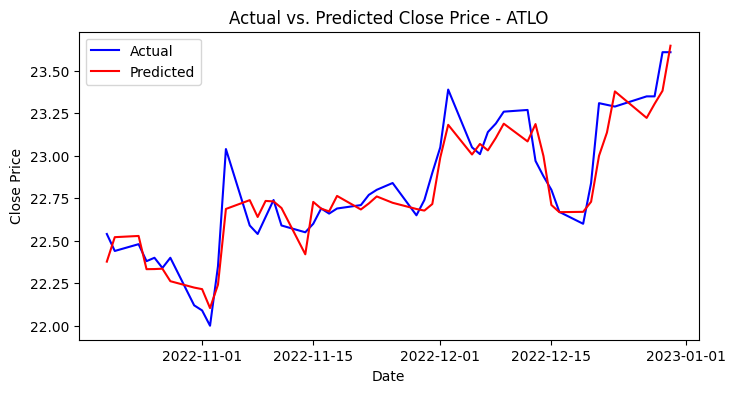

r2_score for ATLO: 0.89203
MSE for ATLO: 0.12495


In [18]:
from sklearn.ensemble import RandomForestRegressor
mse_RandomForest_list = []
r2_score_RandomForest_list = []

for ticker in company_list:
    ticker_data = company_data[ticker]

    train_data = ticker_data.iloc[:-50]
    test_data = ticker_data.iloc[-50:]
    
    X_train, y_train = train_data[['open', 'high', 'low', 'volume']], train_data['close']
    X_test, y_test = test_data[['open', 'high', 'low', 'volume']], test_data['close']

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    dates_test = data.iloc[X_test.index]['date']
    
    plt.figure(figsize=(8, 4))
    plt.plot(dates_test, y_test, label='Actual', color='blue')
    plt.plot(dates_test, y_pred, label='Predicted', color='red')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Actual vs. Predicted Close Price - {ticker}')
    plt.legend()
    plt.show()
    
    r2_score_RandomForest = r2_score(y_test, y_pred)
    mse_RandomForest = mean_squared_error(y_test, y_pred, squared=False)
    r2_score_RandomForest_list.append(r2_score_Linear)
    mse_RandomForest_list.append(mse_Linear)
    print(f'r2_score for {ticker}: {r2_score_RandomForest:.5f}')
    print(f'MSE for {ticker}: {mse_RandomForest:.5f}')


# Comparing applied models' rmse and accuracy

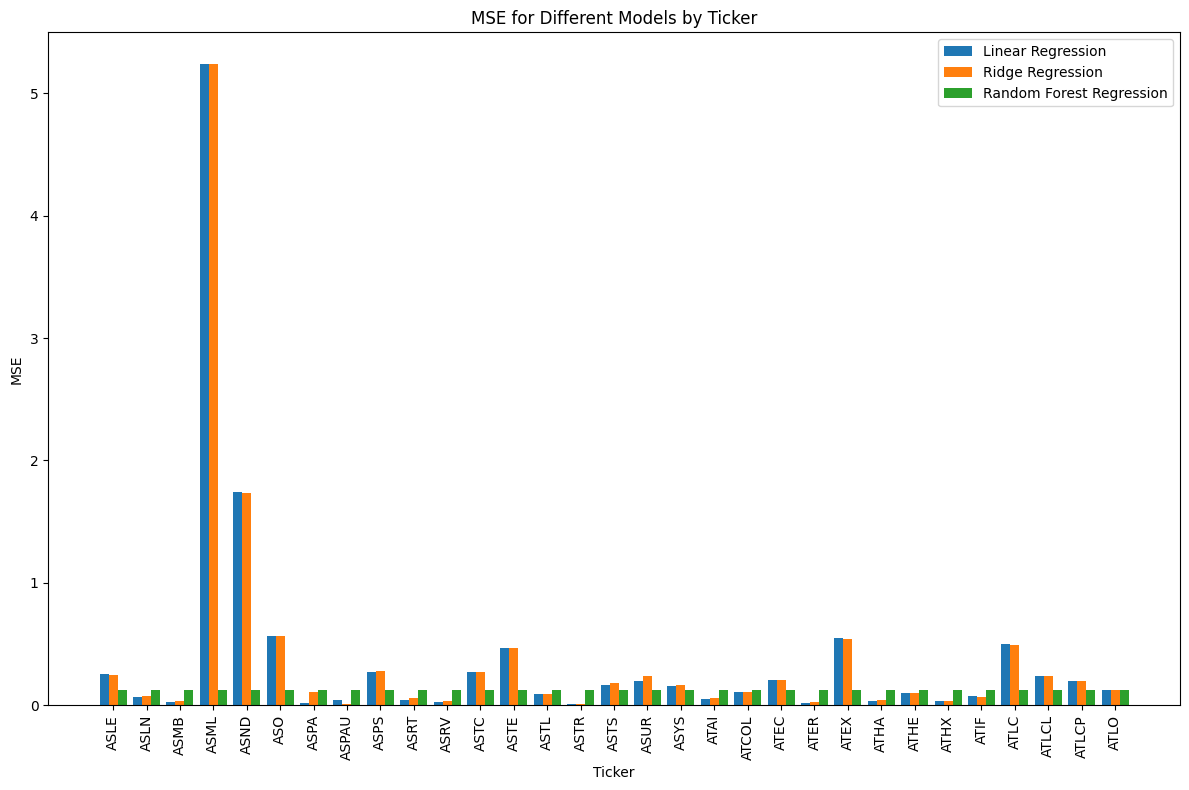

In [19]:
models = ['Linear Regression', 'Ridge Regression', 'Random Forest Regression']
mse_lists = [mse_Linear_list, mse_Ridge_list, mse_RandomForest_list]

num_tickers_to_plot = len(company_list)

ticker_indices = np.arange(num_tickers_to_plot)

bar_width = 0.27

plt.figure(figsize=(12, 8))

for i, (model, mse_list) in enumerate(zip(models, mse_lists)):
    bar_positions = ticker_indices + (i * bar_width)
    plt.bar(bar_positions, mse_list[:num_tickers_to_plot], width=bar_width, label=model)

plt.xlabel('Ticker')
plt.ylabel('MSE')
plt.title('MSE for Different Models by Ticker')
plt.xticks(ticker_indices + bar_width, company_list[:num_tickers_to_plot], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
mean_mse_linear = sum(mse_Linear_list) / len(mse_Linear_list)
mean_mse_Ridge = sum(mse_Ridge_list) / len(mse_Ridge_list)
mean_mse_RF = sum(mse_RandomForest_list) / len(mse_RandomForest_list)

print(f' mean of mse of linear regression {mean_r2_linear}')
print(f' mean of mse of Ridge regression {mean_r2_Ridge}')
print(f' mean of mse of Random Forest regression {mean_RF}')

 mean of mse of linear regression 0.7765220324812391
 mean of mse of Ridge regression 0.8739864328884659
 mean of mse of Random Forest regression 0.8966612935629498


# Visualization 

random forest regression model shows best mse values for all tickers as compared to linear and ridge regression.

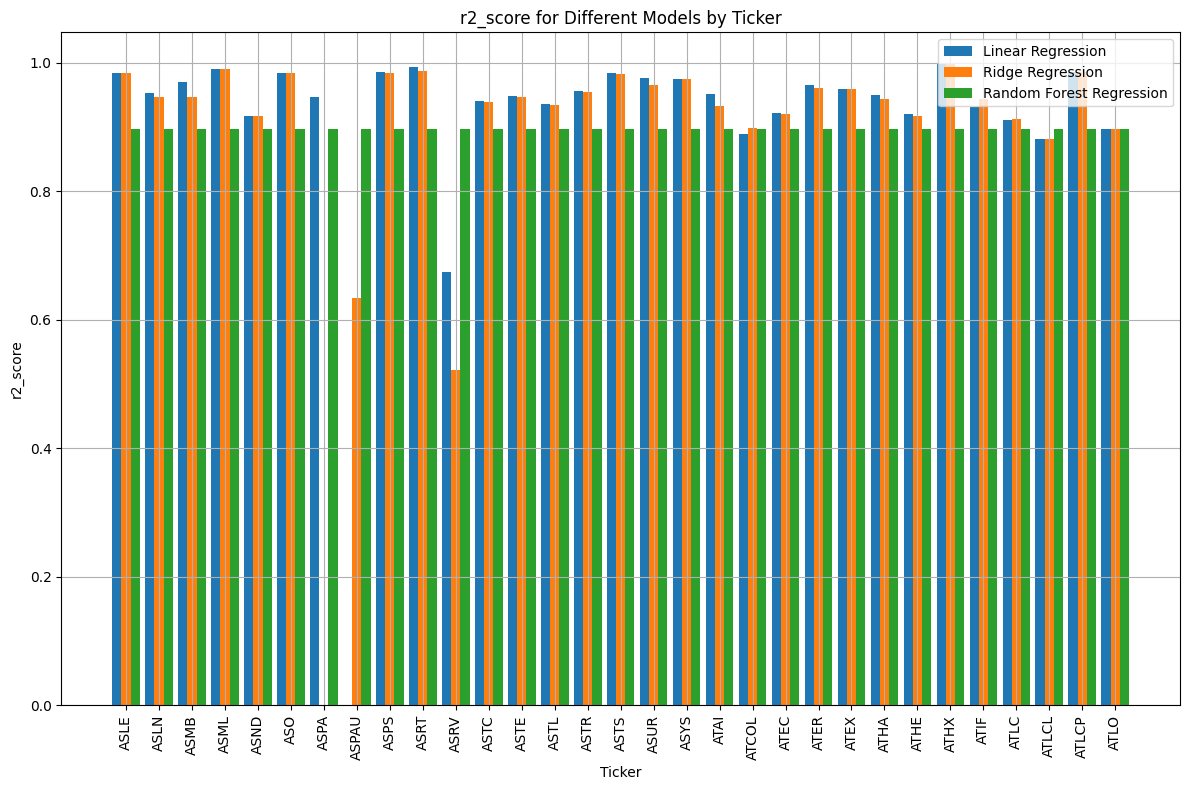

In [20]:
models = ['Linear Regression', 'Ridge Regression', 'Random Forest Regression']
r2_score_lists = [r2_score_Linear_list, r2_score_Ridge_list, r2_score_RandomForest_list]

num_tickers_to_plot = len(company_list)

ticker_indices = np.arange(num_tickers_to_plot)

bar_width = 0.28

plt.figure(figsize=(12, 8))

for i, (model, r2_score_list) in enumerate(zip(models, r2_score_lists)):
    positive_r2_score_list = [score if score >= 0 else 0 for score in r2_score_list]
    bar_positions = ticker_indices + (i * bar_width)
    
    plt.bar(bar_positions, positive_r2_score_list[:num_tickers_to_plot], width=bar_width, label=model)

plt.xlabel('Ticker')
plt.ylabel('r2_score')
plt.title('r2_score for Different Models by Ticker')
plt.xticks(ticker_indices + bar_width, company_list[:num_tickers_to_plot], rotation=90)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [34]:
mean_r2_linear = sum(r2_score_Linear_list) / len(r2_score_Linear_list)
mean_r2_Ridge = sum(r2_score_Ridge_list) / len(r2_score_Ridge_list)
mean_RF = sum(r2_score_RandomForest_list) / len(r2_score_RandomForest_list)

print(f' mean of R2 scores of linear regression {mean_r2_linear}')
print(f' mean of R2 scores of Ridge regression {mean_r2_Ridge}')
print(f' mean of R2 scores of Random Forest regression {mean_RF}')

 mean of R2 scores of linear regression 0.7765220324812391
 mean of R2 scores of Ridge regression 0.8739864328884659
 mean of R2 scores of Random Forest regression 0.8966612935629498


# Visualization 

The Random Forest regression model demonstrates the highest mean R-squared score, indicating superior predictive performance compared to Linear Regression and Ridge Regression.